# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")


In [16]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file

df = pd.read_parquet(r"C:\Users\Santosh\Downloads\1869a29c-698e-4747-be2f-a4b9f4b0592f-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\New york\yellow_tripdata_2023-01.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
# Load only a fraction of the dataset to avoid memory overload
df_sampled = df.sample(frac=0.5, random_state=42)  # Taking a 10% sample
df_sampled.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1533383 entries, 2790731 to 262007
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1533383 non-null  int64         
 1   tpep_pickup_datetime   1533383 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1533383 non-null  datetime64[us]
 3   passenger_count        1497566 non-null  float64       
 4   trip_distance          1533383 non-null  float64       
 5   RatecodeID             1497566 non-null  float64       
 6   store_and_fwd_flag     1497566 non-null  object        
 7   PULocationID           1533383 non-null  int64         
 8   DOLocationID           1533383 non-null  int64         
 9   payment_type           1533383 non-null  int64         
 10  fare_amount            1533383 non-null  float64       
 11  extra                  1533383 non-null  float64       
 12  mta_tax                15333

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [260]:
import os
import pandas as pd
from datetime import datetime

# Set the directory containing the Parquet files
data_dir = r'C:\Users\Santosh\Downloads\1869a29c-698e-4747-be2f-a4b9f4b0592f-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\New york'
os.chdir(data_dir)

# List all .parquet files in the directory
file_list = [file for file in os.listdir() if file.endswith('.parquet')]

# Initialize the final DataFrame
final_df = pd.DataFrame()

# Loop through each Parquet file
for file_name in file_list:
    try:
        print(f"Processing {file_name}...")
        file_path = os.path.join(data_dir, file_name)

        # Read the Parquet file
        df_month = pd.read_parquet(file_path)

        # Ensure the datetime column is parsed correctly
        if 'pickup_datetime' not in df_month.columns:
            # Try alternate column name if available
            datetime_col = [col for col in df_month.columns if 'pickup' in col and 'datetime' in col]
            if datetime_col:
                df_month['pickup_datetime'] = pd.to_datetime(df_month[datetime_col[0]])
            else:
                raise ValueError("No pickup datetime column found.")
        else:
            df_month['pickup_datetime'] = pd.to_datetime(df_month['pickup_datetime'])

        # Extract date and hour
        df_month['date'] = df_month['pickup_datetime'].dt.date
        df_month['hour'] = df_month['pickup_datetime'].dt.hour

        # Store sampled data from the current month
        sampled_data = pd.DataFrame()

        # Loop over each unique date
        for date in df_month['date'].unique():
            day_data = df_month[df_month['date'] == date]

            for hour in range(24):
                hour_data = day_data[day_data['hour'] == hour]

                if not hour_data.empty:
                    sampled_hour = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sampled_hour], ignore_index=True)

        # Add to final combined DataFrame
        final_df = pd.concat([final_df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Done!
print("Final sampled data shape:", final_df.shape)


Processing sampled_nyc_taxi_data.parquet...
Processing yellow_tripdata_2023-01.parquet...
Processing yellow_tripdata_2023-02.parquet...
Processing yellow_tripdata_2023-03.parquet...
Processing yellow_tripdata_2023-04.parquet...
Processing yellow_tripdata_2023-05.parquet...
Processing yellow_tripdata_2023-06.parquet...
Processing yellow_tripdata_2023-07.parquet...
Processing yellow_tripdata_2023-08.parquet...
Processing yellow_tripdata_2023-09.parquet...
Processing yellow_tripdata_2023-10.parquet...
Processing yellow_tripdata_2023-11.parquet...
Processing yellow_tripdata_2023-12.parquet...
Final sampled data shape: (1930214, 23)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [30]:
# Limit the total number of entries to around 300,000 max
if final_df.shape[0] > 300_000:
    final_df = final_df.sample(n=300_000, random_state=42).reset_index(drop=True)

# Save as Parquet
final_df.to_parquet('sampled_nyc_taxi_data.parquet', index=False)




# Optional: Also save as CSV
final_df.to_csv('sampled_nyc_taxi_data.csv', index=False)

print("Saved to 'sampled_nyc_taxi_data.parquet' and 'sampled_nyc_taxi_data.csv'")


Saved to 'sampled_nyc_taxi_data.parquet' and 'sampled_nyc_taxi_data.csv'


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [33]:
# Load the new data file

import pandas as pd

# Load from Parquet
#df_loaded = pd.read_parquet('sampled_nyc_taxi_data.parquet')

# Optional: Load from CSV instead
df_loaded = pd.read_csv('sampled_nyc_taxi_data.csv')

# Preview the loaded data
df_loaded.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-19 13:55:00   2023-10-19 14:02:02              1.0   
1         2  2023-12-21 18:51:03   2023-12-21 19:09:07              NaN   
2         2  2023-05-31 11:17:38   2023-05-31 11:41:13              1.0   
3         2  2023-02-04 11:14:15   2023-02-04 11:25:55              1.0   
4         2  2023-02-01 07:56:51   2023-02-01 08:06:13              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.91         1.0                  N           246           186   
1           2.91         NaN                NaN           233           249   
2           7.91         1.0                  N           140            13   
3           1.91         1.0                  N           236           140   
4           1.29         1.0                  N            68           234   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        1.26           0.0                    1.0   
1             0  ...        0.00           0.0                    1.0   
2             1  ...        8.26           0.0                    1.0   
3             2  ...        0.00           0.0                    1.0   
4             1  ...        2.94           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee      pickup_datetime  \
0         13.86                   2.5          NaN  2023-10-19 13:55:00   
1         28.75                   NaN          NaN  2023-12-21 18:51:03   
2         49.56                   2.5          NaN  2023-05-31 11:17:38   
3         17.50                   2.5          NaN  2023-02-04 11:14:15   
4         17.64                   2.5          NaN  2023-02-01 07:56:51   

         date  hour Airport_fee  
0  2023-10-19    13         0.0  
1  2023-12-21    18         NaN  
2  2023-05-31    11         0.0  
3  2023-02-04    11         0.0  
4  2023-02-01     7         0.0  

[5 rows x 23 columns]

In [34]:

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [35]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [38]:
# Reset the index in case it's not clean
df_loaded.reset_index(drop=True, inplace=True)

# View column names to decide which to drop
print("Columns before cleanup:\n", df_loaded.columns)

# Drop unnecessary or duplicate columns, EXCLUDING 'Airport_fee'
cols_to_drop = ['pickup_datetime', 'date', 'hour', 'index', 'unnamed: 0']

# Only drop columns that actually exist
df_loaded.drop(columns=[col for col in cols_to_drop if col in df_loaded.columns], inplace=True)

# Final check
print("\nColumns after cleanup:\n", df_loaded.columns)
df_loaded.head()

Columns before cleanup:
 Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'pickup_datetime', 'date', 'hour', 'Airport_fee'],
      dtype='object')

Columns after cleanup:
 Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-19 13:55:00   2023-10-19 14:02:02              1.0   
1         2  2023-12-21 18:51:03   2023-12-21 19:09:07              NaN   
2         2  2023-05-31 11:17:38   2023-05-31 11:41:13              1.0   
3         2  2023-02-04 11:14:15   2023-02-04 11:25:55              1.0   
4         2  2023-02-01 07:56:51   2023-02-01 08:06:13              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.91         1.0                  N           246           186   
1           2.91         NaN                NaN           233           249   
2           7.91         1.0                  N           140            13   
3           1.91         1.0                  N           236           140   
4           1.29         1.0                  N            68           234   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         8.60    0.0      0.5        1.26           0.0   
1             0        24.75    0.0      0.5        0.00           0.0   
2             1        37.30    0.0      0.5        8.26           0.0   
3             2        13.50    0.0      0.5        0.00           0.0   
4             1        10.70    0.0      0.5        2.94           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.86                   2.5          NaN   
1                    1.0         28.75                   NaN          NaN   
2                    1.0         49.56                   2.5          NaN   
3                    1.0         17.50                   2.5          NaN   
4                    1.0         17.64                   2.5          NaN   

   Airport_fee  
0          0.0  
1          NaN  
2          0.0  
3          0.0  
4          0.0

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [40]:
# Combine the two airport fee columns


# Check if both 'airport_fee' columns exist
if 'airport_fee' in df_loaded.columns and 'Airport_fee' in df_loaded.columns:
    # Create a new 'airport_fee' column by summing the two existing ones
    df_loaded['airport_fee'] = df_loaded['airport_fee'] + df_loaded['Airport_fee']

    # Drop the original 'Airport_fee' column
    df_loaded.drop(columns=['Airport_fee'], inplace=True)

    print("Combined the two airport fee columns by summing their values.")
    print(df_loaded.head())
elif 'airport_fee' in df_loaded.columns and 'Airport_fee' not in df_loaded.columns:
    print("Only one 'airport_fee' column found. No combination needed.")
elif 'airport_fee' not in df_loaded.columns and 'Airport_fee' in df_loaded.columns:
    # Rename 'Airport_fee' to 'airport_fee' if that's the desired name
    df_loaded.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)
    print("Renamed 'Airport_fee' to 'airport_fee'.")
else:
    print("No airport fee columns found to combine.")

print("\nColumns after potential combination:\n", df_loaded.columns)

Combined the two airport fee columns by summing their values.
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-19 13:55:00   2023-10-19 14:02:02              1.0   
1         2  2023-12-21 18:51:03   2023-12-21 19:09:07              NaN   
2         2  2023-05-31 11:17:38   2023-05-31 11:41:13              1.0   
3         2  2023-02-04 11:14:15   2023-02-04 11:25:55              1.0   
4         2  2023-02-01 07:56:51   2023-02-01 08:06:13              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.91         1.0                  N           246           186   
1           2.91         NaN                NaN           233           249   
2           7.91         1.0                  N           140            13   
3           1.91         1.0                  N           236           140   
4           1.29         1.0                  N            68           234   

   payment_t

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [42]:
# check where values of fare amount are negative

negative_fare = df_loaded[df_loaded['fare_amount'] < 0]

if not negative_fare.empty:
    print("Rows with negative fare amounts:")
    print(negative_fare)
    print(f"\nNumber of rows with negative fare amounts: {len(negative_fare)}")
else:
    print("No rows found with negative fare amounts in the 'fare_amount' column.")


Rows with negative fare amounts:
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
43             2  2023-06-15 22:57:53   2023-06-15 23:03:57              1.0   
428            2  2023-04-28 15:22:36   2023-04-28 15:24:21              1.0   
475            2  2023-11-09 11:23:07   2023-11-09 11:30:10              1.0   
741            2  2023-09-07 01:03:19   2023-09-07 01:31:10              1.0   
824            2  2023-07-23 17:00:13   2023-07-23 17:20:22              1.0   
...          ...                  ...                   ...              ...   
299751         2  2023-06-06 11:31:51   2023-06-06 12:19:02              1.0   
299754         2  2023-08-13 15:18:00   2023-08-13 15:39:50              2.0   
299799         2  2023-01-12 22:07:38   2023-01-12 22:28:48              1.0   
299971         2  2023-11-19 02:26:29   2023-11-19 03:06:00              1.0   
299977         2  2023-12-14 06:59:21   2023-12-14 07:05:17              1.0   

      

Did you notice something different in the `RatecodeID` column for above records?

In [44]:
# Analyse RatecodeID for the negative fare amounts
# from the previous step

if not negative_fare.empty:
    ratecode_analysis = negative_fare['RatecodeID'].value_counts().sort_index()
    print("Analysis of RatecodeID for trips with negative fare amounts:")
    print(ratecode_analysis)
else:
    print("No negative fare amounts found, so no RatecodeID analysis to perform.")


Analysis of RatecodeID for trips with negative fare amounts:
RatecodeID
1.0    2589
2.0     202
3.0      36
4.0      14
5.0      50
Name: count, dtype: int64


In [45]:
# Find which columns have negative values

negative_value_columns = []
for col in df_loaded.columns:
    if pd.api.types.is_numeric_dtype(df_loaded[col]):  # Check if the column is numeric
        if (df_loaded[col] < 0).any():  # Check if any value in the column is negative
            negative_value_columns.append(col)

if negative_value_columns:
    print("Columns with negative values:")
    for col in negative_value_columns:
        print(f"- {col}")
else:
    print("No columns with negative values found in the DataFrame.")

Columns with negative values:
- fare_amount
- extra
- mta_tax
- tip_amount
- tolls_amount
- improvement_surcharge
- total_amount
- congestion_surcharge


In [46]:
# fix these negative values

# Identify rows with negative values in the specified columns
cols_to_check = ['fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount',
                  'congestion_surcharge']

negative_rows_mask = (df_loaded[cols_to_check] < 0).any(axis=1)

# Remove the rows where the mask is True (i.e., at least one negative value exists)
df_loaded_cleaned = df_loaded[~negative_rows_mask].copy()

print(f"Original DataFrame shape: {df_loaded.shape}")
print(f"Cleaned DataFrame shape (after removing negative value rows): {df_loaded_cleaned.shape}")

# Verify that negative values are gone in the checked columns
for col in cols_to_check:
    if (df_loaded_cleaned[col] < 0).any():
        print(f"Warning: Negative values still found in {col}")
    else:
        print(f"No negative values found in {col} in the cleaned DataFrame.")

df_loaded = df_loaded_cleaned # Update the original DataFrame with the cleaned one


Original DataFrame shape: (300000, 19)
Cleaned DataFrame shape (after removing negative value rows): (297059, 19)
No negative values found in fare_amount in the cleaned DataFrame.
No negative values found in extra in the cleaned DataFrame.
No negative values found in mta_tax in the cleaned DataFrame.
No negative values found in tip_amount in the cleaned DataFrame.
No negative values found in tolls_amount in the cleaned DataFrame.
No negative values found in improvement_surcharge in the cleaned DataFrame.
No negative values found in total_amount in the cleaned DataFrame.
No negative values found in congestion_surcharge in the cleaned DataFrame.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [49]:
# Find the proportion of missing values in each column


missing_proportion = df_loaded.isnull().sum() / len(df_loaded)

print("Proportion of missing values in each column:")
print(missing_proportion.sort_values(ascending=False))

Proportion of missing values in each column:
airport_fee              1.000000
congestion_surcharge     0.033983
passenger_count          0.033983
RatecodeID               0.033983
store_and_fwd_flag       0.033983
extra                    0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
VendorID                 0.000000
fare_amount              0.000000
tpep_pickup_datetime     0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
payment_type             0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [51]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
import pandas as pd


# Display the rows with null values
rows_with_nan = df_loaded[df_loaded.isnull().any(axis=1)]
print("Rows with at least one NaN value:")
print(rows_with_nan.head())  # Display the first few rows with NaN
print(f"\nTotal number of rows with NaN values: {len(rows_with_nan)}")

# Impute NaN values in 'passenger_count' with the median
median_passenger_count = df_loaded['passenger_count'].median()
df_loaded['passenger_count'].fillna(median_passenger_count, inplace=True)

# Verify that NaN values in 'passenger_count' have been imputed
print("\nNumber of NaN values in 'passenger_count' after imputation:")
print(df_loaded['passenger_count'].isnull().sum())

# Display the first few rows after imputation in 'passenger_count'
print("\nFirst few rows after imputing 'passenger_count':")
print(df_loaded.head())

Rows with at least one NaN value:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-19 13:55:00   2023-10-19 14:02:02              1.0   
1         2  2023-12-21 18:51:03   2023-12-21 19:09:07              NaN   
2         2  2023-05-31 11:17:38   2023-05-31 11:41:13              1.0   
3         2  2023-02-04 11:14:15   2023-02-04 11:25:55              1.0   
4         2  2023-02-01 07:56:51   2023-02-01 08:06:13              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.91         1.0                  N           246           186   
1           2.91         NaN                NaN           233           249   
2           7.91         1.0                  N           140            13   
3           1.91         1.0                  N           236           140   
4           1.29         1.0                  N            68           234   

   payment_type  fare_amount  extra  mta

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [54]:
# Fix missing values in 'RatecodeID


# Display the number of NaN values in 'RatecodeID' before imputation
print("Number of NaN values in 'RatecodeID' before imputation:", df_loaded['RatecodeID'].isnull().sum())

# Analyze the distribution of 'RatecodeID' to choose an imputation method
print("\Value counts of 'RatecodeID':")
print(df_loaded['RatecodeID'].value_counts(dropna=False))

# Impute NaN values in 'RatecodeID' with the mode (most frequent value)
mode_ratecode = df_loaded['RatecodeID'].mode()[0]
df_loaded['RatecodeID'].fillna(mode_ratecode, inplace=True)

# Verify that NaN values in 'RatecodeID' have been imputed
print("\nNumber of NaN values in 'RatecodeID' after imputation:", df_loaded['RatecodeID'].isnull().sum())

# Display the value counts of 'RatecodeID' after imputation
print("\nValue counts of 'RatecodeID' after imputation:")
print(df_loaded['RatecodeID'].value_counts(dropna=False))


Number of NaN values in 'RatecodeID' before imputation: 10095
\Value counts of 'RatecodeID':
RatecodeID
1.0     270955
2.0      11240
NaN      10095
5.0       1670
99.0      1549
3.0        969
4.0        579
6.0          2
Name: count, dtype: int64

Number of NaN values in 'RatecodeID' after imputation: 0

Value counts of 'RatecodeID' after imputation:
RatecodeID
1.0     281050
2.0      11240
5.0       1670
99.0      1549
3.0        969
4.0        579
6.0          2
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [58]:
# Handle any remaining missing values

# Display the initial number of NaN values in 'congestion_surcharge'
print("Number of NaN values in 'congestion_surcharge' before imputation:", df_loaded['congestion_surcharge'].isnull().sum())

# Analyze the distribution of 'congestion_surcharge'
print("\nSummary statistics of 'congestion_surcharge':")
print(df_loaded['congestion_surcharge'].describe())

print("\nValue counts of 'congestion_surcharge':")
print(df_loaded['congestion_surcharge'].value_counts(dropna=False).head()) # Display top few values including NaN

# Decide on imputation method (mean or median)
# Based on the describe() output, let's use the median as it's less sensitive to potential outliers
median_congestion_surcharge = df_loaded['congestion_surcharge'].median()

# Impute NaN values with the median
df_loaded['congestion_surcharge'].fillna(median_congestion_surcharge, inplace=True)

# Verify that NaN values in 'congestion_surcharge' have been imputed
print("\nNumber of NaN values in 'congestion_surcharge' after imputation:", df_loaded['congestion_surcharge'].isnull().sum())

print("\nFirst few values of 'congestion_surcharge' after imputation:")
print(df_loaded['congestion_surcharge'].head())


Number of NaN values in 'congestion_surcharge' before imputation: 10095

Summary statistics of 'congestion_surcharge':
count    286964.000000
mean          2.309366
std           0.663509
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

Value counts of 'congestion_surcharge':
congestion_surcharge
2.5    265082
0.0     21882
NaN     10095
Name: count, dtype: int64

Number of NaN values in 'congestion_surcharge' after imputation: 0

First few values of 'congestion_surcharge' after imputation:
0    2.5
1    2.5
2    2.5
3    2.5
4    2.5
Name: congestion_surcharge, dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [61]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# Describe the numerical columns
print("Descriptive statistics for numerical columns:")
print(df_loaded.describe())

# Check for outliers in 'passenger_count'
print("\nValue counts for 'passenger_count':")
print(df_loaded['passenger_count'].value_counts().sort_index())

# Check for outliers in 'trip_distance'
print("\nSummary statistics for 'trip_distance':")
print(df_loaded['trip_distance'].describe())
print("\nTop 10 largest 'trip_distance' values:")
print(df_loaded['trip_distance'].nlargest(10))

# Check for outliers in 'fare_amount'
print("\nSummary statistics for 'fare_amount':")
print(df_loaded['fare_amount'].describe())
print("\nTop 10 largest 'fare_amount' values:")
print(df_loaded['fare_amount'].nlargest(10))

# Check for outliers in 'tip_amount'
print("\nSummary statistics for 'tip_amount':")
print(df_loaded['tip_amount'].describe())
print("\nTop 10 largest 'tip_amount' values:")
print(df_loaded['tip_amount'].nlargest(10))

# Check for outliers in 'total_amount'
print("\nSummary statistics for 'total_amount':")
print(df_loaded['total_amount'].describe())
print("\nTop 10 largest 'total_amount' values:")
print(df_loaded['total_amount'].nlargest(10))

# Check for illogical timestamps (basic check: drop-off before pickup)
illogical_times = df_loaded[df_loaded['tpep_dropoff_datetime'] < df_loaded['tpep_pickup_datetime']]
print(f"\nNumber of trips with drop-off time before pickup time: {len(illogical_times)}")
if not illogical_times.empty:
    print("\nFirst few illogical time entries:")
    print(illogical_times[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head())

Descriptive statistics for numerical columns:
            VendorID  passenger_count  trip_distance     RatecodeID  \
count  297059.000000    297059.000000  297059.000000  297059.000000   
mean        1.733652         1.358727       4.503727       1.583746   
std         0.447273         0.881751     374.306118       7.063820   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.790000       1.000000   
75%         2.000000         1.000000       3.400000       1.000000   
max         6.000000         8.000000  159017.600000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  297059.000000  297059.000000  297059.000000  297059.000000   
mean      165.354212     164.149708       1.164520      19.856450   
std        63.940651      69.862553       0.510201      18.307912   
min         1.000000       1.000000   

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [65]:
# remove passenger_count > 6

# Remove rows where passenger_count is greater than 6
df_cleaned_passenger = df_loaded[df_loaded['passenger_count'] <= 6].copy()
print(f"Shape of DataFrame before removing passenger_count > 6: {df_loaded.shape}")
print(f"Shape of DataFrame after removing passenger_count > 6: {df_cleaned_passenger.shape}")

# Update df_loaded with the filtered data
df_loaded = df_cleaned_passenger

Shape of DataFrame before removing passenger_count > 6: (297059, 19)
Shape of DataFrame after removing passenger_count > 6: (297057, 19)


In [66]:
# Continue with outlier handling
# 1. Drop entries where trip_distance is nearly 0 and fare_amount is more than 300
mask_dist_near_zero_high_fare = (df_loaded['trip_distance'] < 0.01) & (df_loaded['fare_amount'] > 300)
df_cleaned_outliers = df_loaded[~mask_dist_near_zero_high_fare].copy()
print(f"Shape after handling near-zero distance and high fare: {df_cleaned_outliers.shape}")
df_loaded = df_cleaned_outliers

# 2. Drop entries where trip_distance and fare_amount are 0 but zones are different
mask_zero_dist_fare_diff_zones = (df_loaded['trip_distance'] == 0) & (df_loaded['fare_amount'] == 0) & (df_loaded['PULocationID'] != df_loaded['DOLocationID'])
df_cleaned_outliers = df_loaded[~mask_zero_dist_fare_diff_zones].copy()
print(f"Shape after handling zero distance/fare with different zones: {df_cleaned_outliers.shape}")
df_loaded = df_cleaned_outliers

# 3. Drop entries where trip_distance is more than 250 miles
mask_high_trip_distance = (df_loaded['trip_distance'] > 250)
df_cleaned_outliers = df_loaded[~mask_high_trip_distance].copy()
print(f"Shape after handling trip_distance > 250 miles: {df_cleaned_outliers.shape}")
df_loaded = df_cleaned_outliers

# 4. Drop entries where payment_type is 0
mask_invalid_payment_type = (df_loaded['payment_type'] == 0)
df_cleaned_outliers = df_loaded[~mask_invalid_payment_type].copy()
print(f"Shape after handling payment_type 0: {df_cleaned_outliers.shape}")
df_loaded = df_cleaned_outliers

print("\nShape of the final cleaned DataFrame after handling specified outliers:", df_loaded.shape)


Shape after handling near-zero distance and high fare: (297045, 19)
Shape after handling zero distance/fare with different zones: (297034, 19)
Shape after handling trip_distance > 250 miles: (297028, 19)
Shape after handling payment_type 0: (286938, 19)

Shape of the final cleaned DataFrame after handling specified outliers: (286938, 19)


In [67]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler
import pandas as pd


numerical_cols_to_standardize = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

scaler = StandardScaler()
df_loaded[numerical_cols_to_standardize] = scaler.fit_transform(df_loaded[numerical_cols_to_standardize])

print(df_loaded[numerical_cols_to_standardize].head())
print(df_loaded[numerical_cols_to_standardize].describe())

   trip_distance  fare_amount  tip_amount  tolls_amount  total_amount
0      -0.558426    -0.612705   -0.574185     -0.273594     -0.657581
2       0.983915     0.965620    1.161888     -0.273594      0.907224
3      -0.338092    -0.343235   -0.886678     -0.273594     -0.498033
4      -0.474699    -0.497217   -0.157528     -0.273594     -0.491896
5      -0.494529    -0.612705   -0.440259     -0.273594     -0.524332
       trip_distance   fare_amount    tip_amount  tolls_amount  total_amount
count   2.869380e+05  2.869380e+05  2.869380e+05  2.869380e+05  2.869380e+05
mean    4.023977e-17 -9.657545e-18 -7.384308e-17 -5.727667e-17  2.933417e-16
std     1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00
min    -7.589307e-01 -1.085652e+00 -8.866784e-01 -2.735937e-01 -1.265094e+00
25%    -5.275796e-01 -5.742089e-01 -6.386679e-01 -2.735937e-01 -5.655341e-01
50%    -3.667354e-01 -3.432345e-01 -1.773684e-01 -2.735937e-01 -3.446204e-01
75%    -1.420035e-02  1.187143e-01  2.169

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [69]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

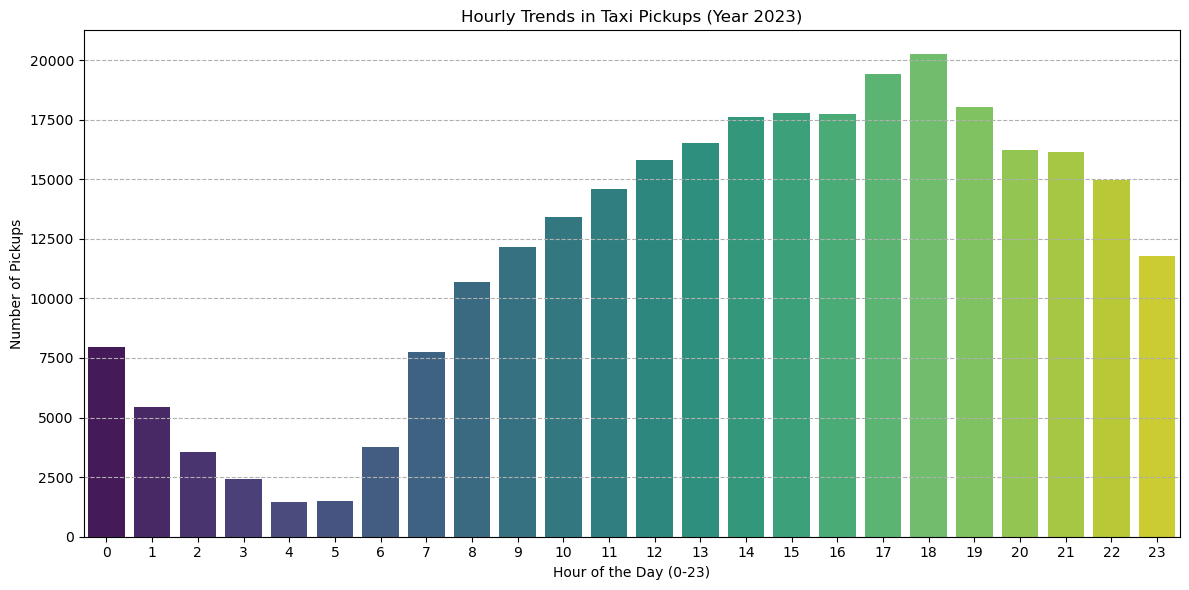


Hourly Pickup Counts:
pickup_hour
0      7975
1      5442
2      3554
3      2407
4      1453
5      1490
6      3757
7      7770
8     10698
9     12177
10    13412
11    14577
12    15796
13    16502
14    17607
15    17781
16    17747
17    19410
18    20237
19    18015
20    16238
21    16146
22    14960
23    11787
Name: count, dtype: int64


In [74]:
# Find and show the hourly trends in taxi pickups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'tpep_pickup_datetime' to datetime objects if it's not already
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract the hour from the pickup datetime
df_loaded['pickup_hour'] = df_loaded['tpep_pickup_datetime'].dt.hour

# Count the number of pickups for each hour
hourly_pickups = df_loaded['pickup_hour'].value_counts().sort_index()

# Create a bar plot to visualize the hourly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette='viridis')
plt.title('Hourly Trends in Taxi Pickups (Year 2023)')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("\nHourly Pickup Counts:")
print(hourly_pickups)

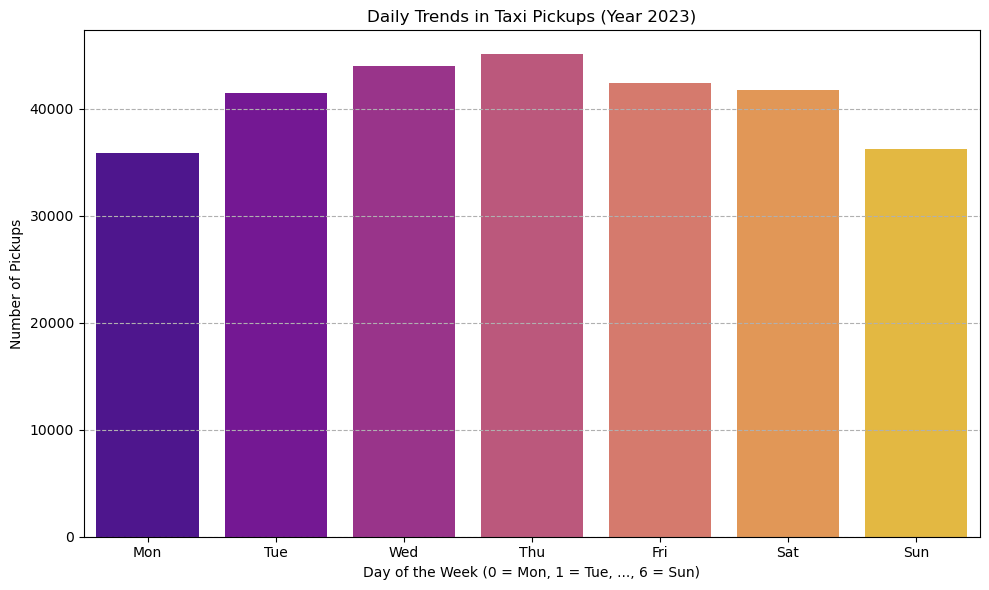


Daily Pickup Counts:
pickup_dayofweek
0    35905
1    41510
2    44045
3    45079
4    42450
5    41739
6    36210
Name: count, dtype: int64


In [75]:
# Find and show the daily trends in taxi pickups (days of the week)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and contains the 'tpep_pickup_datetime' column
# Make sure 'tpep_pickup_datetime' is in datetime format (as done in the previous step)

# Extract the day of the week from the pickup datetime (0 = Monday, 6 = Sunday)
df_loaded['pickup_dayofweek'] = df_loaded['tpep_pickup_datetime'].dt.dayofweek

# Count the number of pickups for each day of the week
daily_pickups = df_loaded['pickup_dayofweek'].value_counts().sort_index()

# Create a bar plot to visualize the daily trends
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='plasma')
plt.title('Daily Trends in Taxi Pickups (Year 2023)')
plt.xlabel('Day of the Week (0 = Mon, 1 = Tue, ..., 6 = Sun)')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("\nDaily Pickup Counts:")
print(daily_pickups)


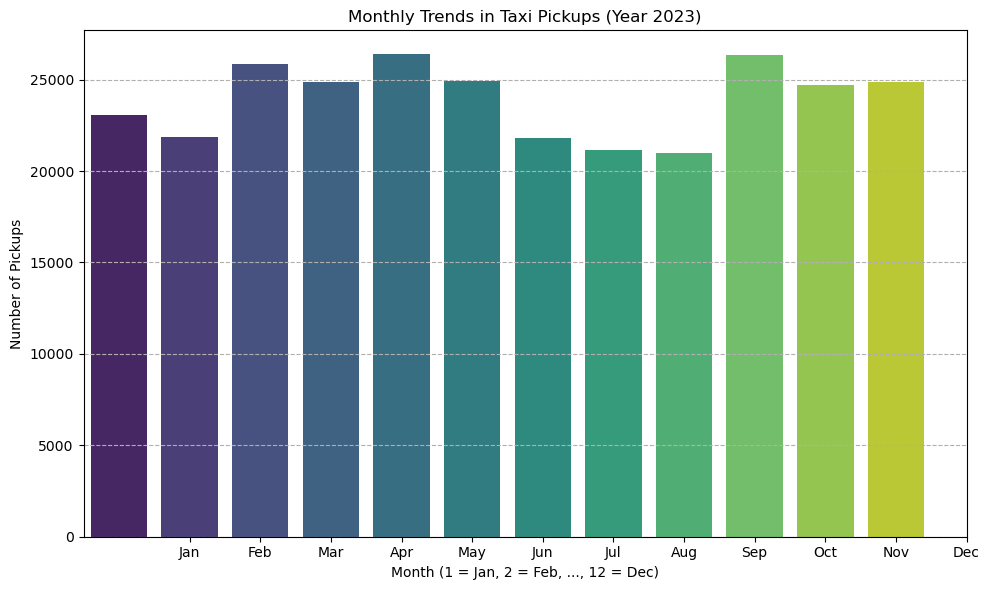


Monthly Pickup Counts:
pickup_month
1     23086
2     21864
3     25875
4     24876
5     26375
6     24950
7     21823
8     21140
9     21007
10    26355
11    24695
12    24892
Name: count, dtype: int64


In [76]:
# Show the monthly trends in pickups
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and contains the 'tpep_pickup_datetime' column
# Make sure 'tpep_pickup_datetime' is in datetime format

# Extract the month from the pickup datetime
df_loaded['pickup_month'] = df_loaded['tpep_pickup_datetime'].dt.month

# Count the number of pickups for each month
monthly_pickups = df_loaded['pickup_month'].value_counts().sort_index()

# Create a bar plot to visualize the monthly trends
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='viridis')
plt.title('Monthly Trends in Taxi Pickups (Year 2023)')
plt.xlabel('Month (1 = Jan, 2 = Feb, ..., 12 = Dec)')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("\nMonthly Pickup Counts:")
print(monthly_pickups)


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [79]:
# Analyse the above parameters
# Analyze the financial parameters and trip distance for zero/negative values

financial_params = ['fare_amount', 'tip_amount', 'total_amount']
other_params = ['trip_distance']
all_params_to_check = financial_params + other_params

for param in all_params_to_check:
    zero_count = (df_loaded[param] == 0).sum()
    negative_count = (df_loaded[param] < 0).sum()
    print(f"Analysis of '{param}':")
    print(f"  Number of zero values: {zero_count}")
    print(f"  Number of negative values: {negative_count}\n")


Analysis of 'fare_amount':
  Number of zero values: 0
  Number of negative values: 201440

Analysis of 'tip_amount':
  Number of zero values: 0
  Number of negative values: 183849

Analysis of 'total_amount':
  Number of zero values: 0
  Number of negative values: 206064

Analysis of 'trip_distance':
  Number of zero values: 0
  Number of negative values: 216766



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [82]:
# Create a df with non zero entries for the selected parameters.
# Create a df with non-zero entries for fare_amount and total_amount
non_zero_fare_total_df = df_loaded[(df_loaded['fare_amount'] != 0) & (df_loaded['total_amount'] != 0)].copy()
print(f"Shape of DataFrame after removing zero fare_amount and total_amount: {non_zero_fare_total_df.shape}")

# Create a df with non-zero trip_distance where pickup and dropoff zones are different
non_zero_distance_diff_zones_df = df_loaded[((df_loaded['trip_distance'] != 0) & (df_loaded['PULocationID'] != df_loaded['DOLocationID'])) |
                                            ((df_loaded['trip_distance'] == 0) & (df_loaded['PULocationID'] == df_loaded['DOLocationID']))].copy()
print(f"Shape of DataFrame after handling zero trip_distance based on zones: {non_zero_distance_diff_zones_df.shape}")

# For tip_amount, keeping zero is generally appropriate, so no specific filtering here.

# You can combine these conditions if needed, depending on your analysis:
non_zero_relevant_df = df_loaded[
    ((df_loaded['fare_amount'] != 0) & (df_loaded['total_amount'] != 0)) &
    (((df_loaded['trip_distance'] != 0) & (df_loaded['PULocationID'] != df_loaded['DOLocationID'])) |
     ((df_loaded['trip_distance'] == 0) & (df_loaded['PULocationID'] == df_loaded['DOLocationID'])))
].copy()
print(f"Shape of combined non-zero DataFrame: {non_zero_relevant_df.shape}")

# If you want a DataFrame with non-zero for fare, total, AND strictly positive distance:
non_zero_strict_distance_df = df_loaded[
    (df_loaded['fare_amount'] != 0) &
    (df_loaded['total_amount'] != 0) &
    (df_loaded['trip_distance'] > 0)
].copy()
print(f"Shape of DataFrame with non-zero fare, total, and positive distance: {non_zero_strict_distance_df.shape}")


Shape of DataFrame after removing zero fare_amount and total_amount: (286938, 22)
Shape of DataFrame after handling zero trip_distance based on zones: (271415, 22)
Shape of combined non-zero DataFrame: (271415, 22)
Shape of DataFrame with non-zero fare, total, and positive distance: (70172, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

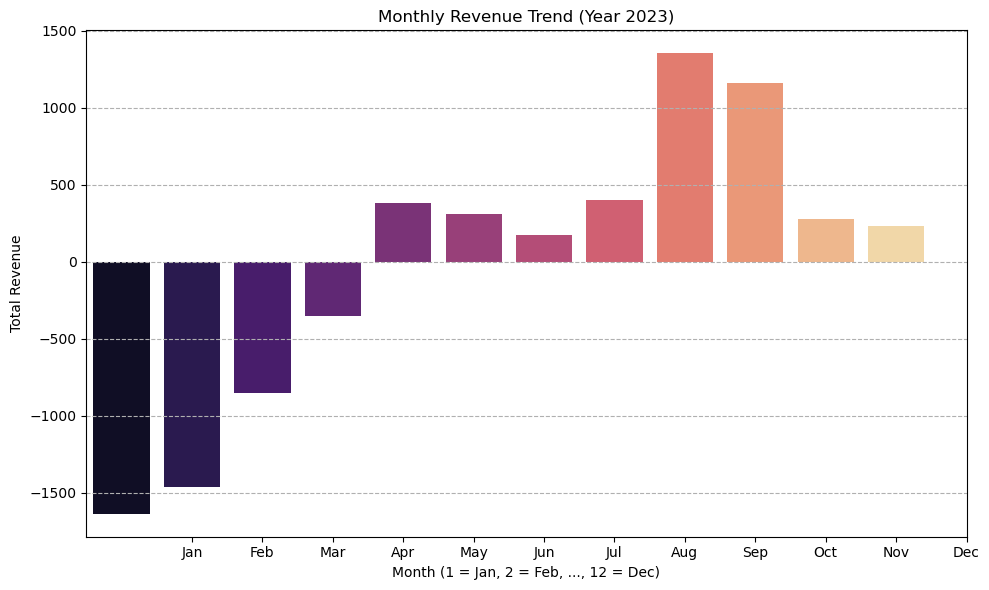


Monthly Revenue:
pickup_month
1    -1635.177157
2    -1464.515388
3     -850.846887
4     -349.325263
5      382.963247
6      312.074521
7      175.933163
8      401.135045
9     1354.779667
10    1160.100539
11     278.941565
12     233.936948
Name: total_amount, dtype: float64


In [84]:
# Group data by month and analyse monthly revenue
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and contains 'tpep_pickup_datetime' and 'total_amount'

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract the month from the pickup datetime
df_loaded['pickup_month'] = df_loaded['tpep_pickup_datetime'].dt.month

# Group by pickup month and calculate the sum of 'total_amount' for each month
monthly_revenue = df_loaded.groupby('pickup_month')['total_amount'].sum()

# Create a bar plot to visualize the monthly revenue trend
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='magma')
plt.title('Monthly Revenue Trend (Year 2023)')
plt.xlabel('Month (1 = Jan, 2 = Feb, ..., 12 = Dec)')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print("\nMonthly Revenue:")
print(monthly_revenue)


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [86]:
# Calculate proportion of each quarter

import pandas as pd

# Assuming your DataFrame is named df_loaded and contains 'tpep_pickup_datetime' and 'total_amount'

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract the month from the pickup datetime
df_loaded['pickup_month'] = df_loaded['tpep_pickup_datetime'].dt.month

# Define the quarters
quarters = {
    1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
}

# Map the month to the quarter
df_loaded['pickup_quarter'] = df_loaded['pickup_month'].map(quarters)

# Group by quarter and calculate the sum of 'total_amount' for each quarter
quarterly_revenue = df_loaded.groupby('pickup_quarter')['total_amount'].sum()

# Calculate the total annual revenue
total_annual_revenue = quarterly_revenue.sum()

# Calculate the proportion of revenue for each quarter
quarterly_revenue_proportion = quarterly_revenue / total_annual_revenue

print("Proportion of Revenue by Quarter:")
print(quarterly_revenue_proportion)

Proportion of Revenue by Quarter:
pickup_quarter
Q1   -4.773257e+13
Q2    4.177087e+12
Q3    2.334164e+13
Q4    2.021385e+13
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

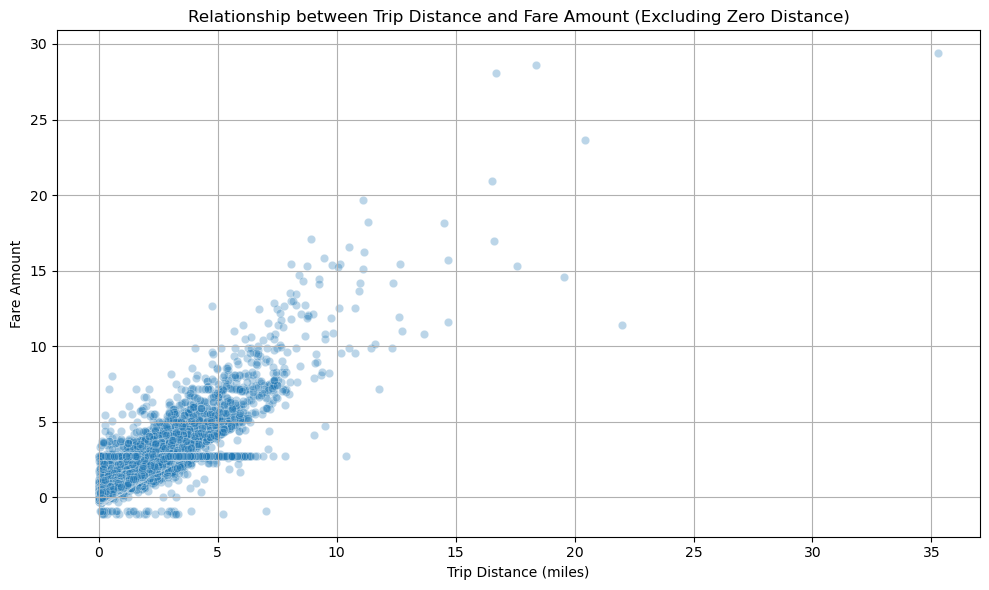


Correlation between Trip Distance and Fare Amount (Excluding Zero Distance): 0.9273


In [88]:
# Show how trip fare is affected by distance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and contains 'trip_distance' and 'fare_amount'

# Filter out trips with trip_distance = 0 for this analysis
df_non_zero_distance = df_loaded[df_loaded['trip_distance'] > 0].copy()

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_non_zero_distance, alpha=0.3)
plt.title('Relationship between Trip Distance and Fare Amount (Excluding Zero Distance)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df_non_zero_distance['trip_distance'].corr(df_non_zero_distance['fare_amount'])
print(f"\nCorrelation between Trip Distance and Fare Amount (Excluding Zero Distance): {correlation:.4f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

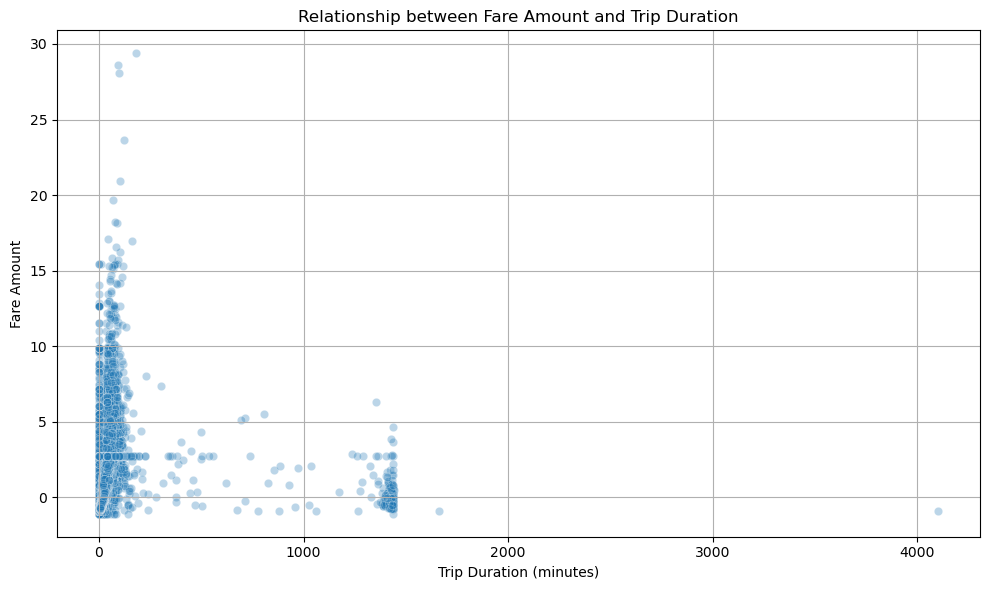


Correlation between Fare Amount and Trip Duration: 0.2692


In [90]:
# Show relationship between fare and trip duration

import pandas as pd


# Ensure both columns are in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])
df_loaded['tpep_dropoff_datetime'] = pd.to_datetime(df_loaded['tpep_dropoff_datetime'])

# Now, recalculate trip duration
df_loaded['trip_duration'] = (df_loaded['tpep_dropoff_datetime'] - df_loaded['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out trips with non-positive trip duration
df_valid_duration = df_loaded[df_loaded['trip_duration'] > 0].copy()

# Visualize the relationship between fare_amount and trip_duration
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_valid_duration, alpha=0.3)
plt.title('Relationship between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between fare_amount and trip_duration
correlation_fare_duration = df_valid_duration['fare_amount'].corr(df_valid_duration['trip_duration'])
print(f"\nCorrelation between Fare Amount and Trip Duration: {correlation_fare_duration:.4f}")


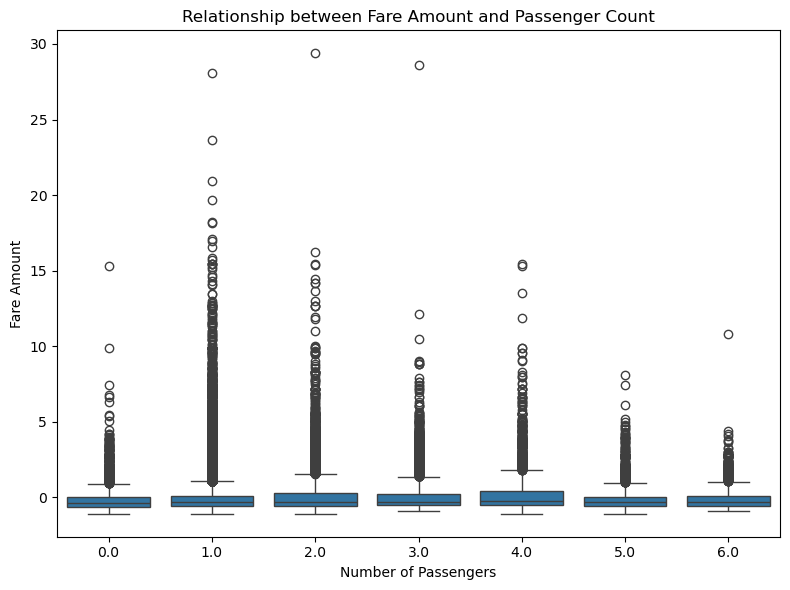


Correlation between Fare Amount and Passenger Count: 0.0455


In [91]:
# Show relationship between fare and number of passengers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and contains 'passenger_count' and 'fare_amount'

# Visualize the relationship between fare_amount and passenger_count
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_loaded)
plt.title('Relationship between Fare Amount and Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.tight_layout()
plt.show()

# Calculate the correlation between fare_amount and passenger_count
correlation_fare_passengers = df_loaded['fare_amount'].corr(df_loaded['passenger_count'])
print(f"\nCorrelation between Fare Amount and Passenger Count: {correlation_fare_passengers:.4f}")


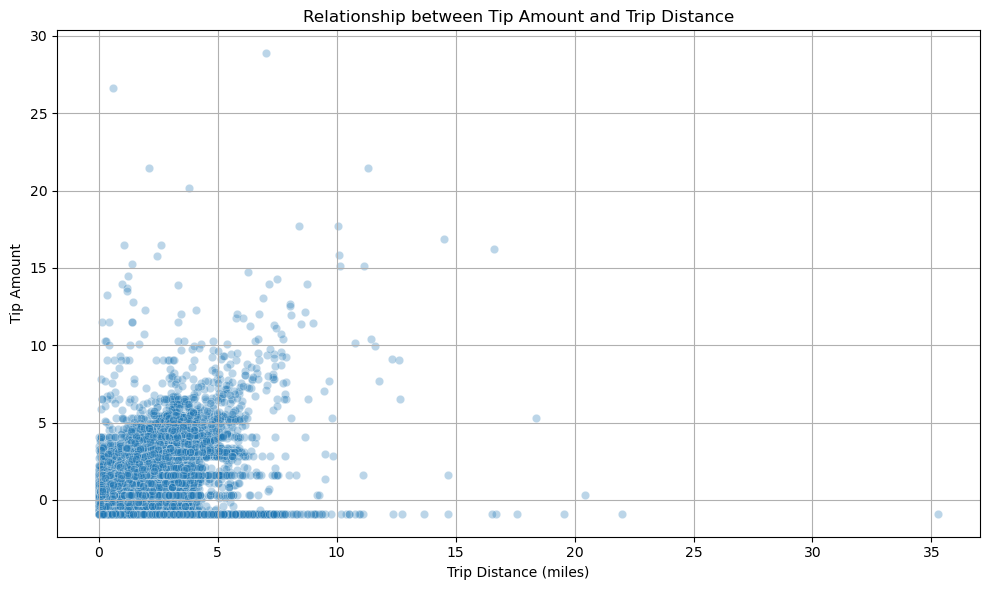


Correlation between Tip Amount and Trip Distance: 0.4352


In [92]:
# Show relationship between tip and trip distance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and contains 'tip_amount' and 'trip_distance'

# Filter out trips with non-positive trip distance (to avoid illogical values)
df_positive_distance = df_loaded[df_loaded['trip_distance'] > 0].copy()

# Visualize the relationship between tip_amount and trip_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_positive_distance, alpha=0.3)
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between tip_amount and trip_distance
correlation_tip_distance = df_positive_distance['tip_amount'].corr(df_positive_distance['trip_distance'])
print(f"\nCorrelation between Tip Amount and Trip Distance: {correlation_tip_distance:.4f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

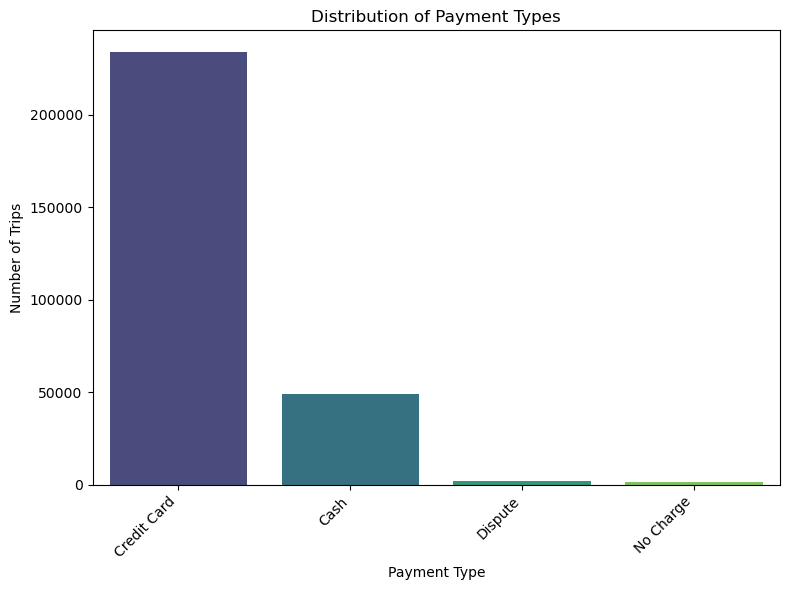


Payment Type Counts:
payment_type_description
Credit Card    233915
Cash            49323
Dispute          2220
No Charge        1480
Name: count, dtype: int64

Proportion of Payment Types:
payment_type_description
Credit Card    0.815211
Cash           0.171894
Dispute        0.007737
No Charge      0.005158
Name: count, dtype: float64


In [94]:
# Analyse the distribution of different payment types (payment_type).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and contains the 'payment_type' column

# Map payment type codes to their descriptions
payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}
df_loaded['payment_type_description'] = df_loaded['payment_type'].map(payment_type_mapping)

# Count the occurrences of each payment type
payment_type_counts = df_loaded['payment_type_description'].value_counts()

# Calculate the proportion of each payment type
payment_type_proportions = payment_type_counts / len(df_loaded)

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nPayment Type Counts:")
print(payment_type_counts)

print("\nProportion of Payment Types:")
print(payment_type_proportions)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [99]:
#!pip install geopandas
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [101]:
#import geopandas as gpd

import geopandas as gpd

zones = gpd.read_file(r"C:\Users\Santosh\Downloads\1869a29c-698e-4747-be2f-a4b9f4b0592f-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


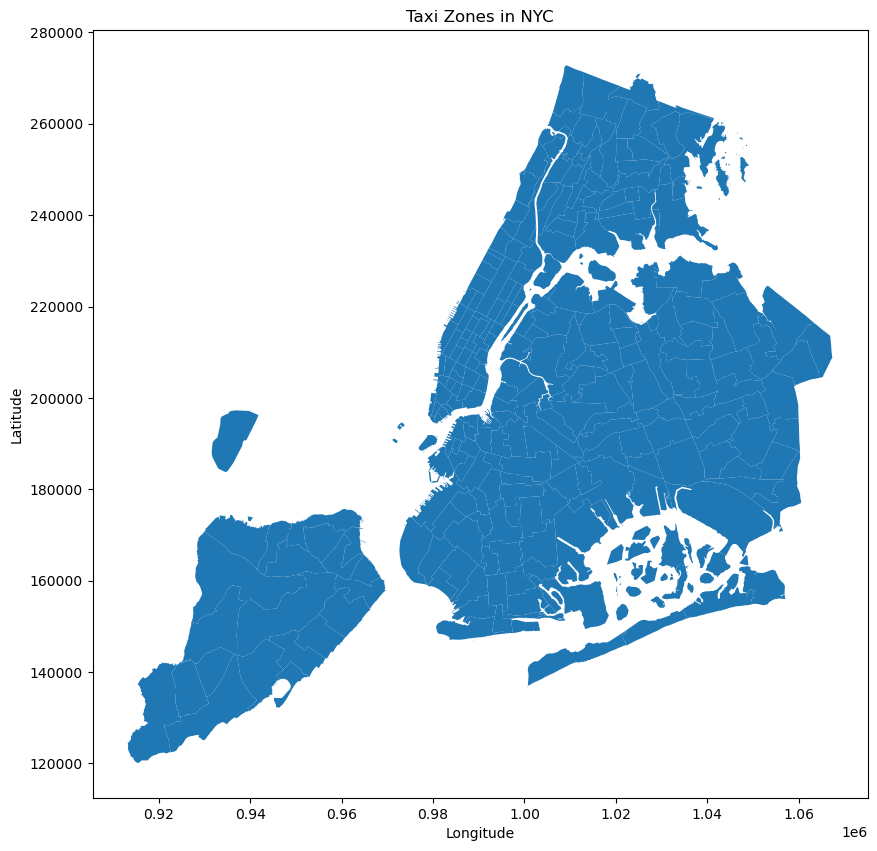

In [103]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot(figsize=(10, 10))
plt.title('Taxi Zones in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [106]:
# Merge zones and trip records using locationID and PULocationID

# Assuming your trip data DataFrame is named df_loaded
# and your zones GeoDataFrame is named zones

# Rename the 'LocationID' column in the zones GeoDataFrame to 'PULocationID'
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'PULocation'})

# Merge trip records with pickup zone information
df_merged_pickup = pd.merge(df_loaded, zones_pickup[['PULocationID', 'PULocation', 'borough', 'geometry']], on='PULocationID', how='left')

print("DataFrame with Pickup Zone Information:")
print(df_merged_pickup.head())

DataFrame with Pickup Zone Information:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-19 13:55:00   2023-10-19 14:02:02              1.0   
1         2  2023-05-31 11:17:38   2023-05-31 11:41:13              1.0   
2         2  2023-02-04 11:14:15   2023-02-04 11:25:55              1.0   
3         2  2023-02-01 07:56:51   2023-02-01 08:06:13              1.0   
4         2  2023-09-25 18:36:33   2023-09-25 18:42:54              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0      -0.558426         1.0                  N           246           186   
1       0.983915         1.0                  N           140            13   
2      -0.338092         1.0                  N           236           140   
3      -0.474699         1.0                  N            68           234   
4      -0.494529         1.0                  N            43           143   

   payment_type  ...  airport_fee 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [108]:
# Group data by location and calculate the number of trips
# Assuming your DataFrame with pickup zone information is named df_merged_pickup

# Group by pickup location name and count the number of trips originating from each zone
pickup_counts_by_location = df_merged_pickup.groupby('PULocation').size().sort_values(ascending=False)

print("Number of Trips Originating from Each Pickup Location:")
print(pickup_counts_by_location.head(10))

# If you want to group by borough instead:
pickup_counts_by_borough = df_merged_pickup.groupby('borough').size().sort_values(ascending=False)

print("\nNumber of Trips Originating from Each Borough:")
print(pickup_counts_by_borough)


Number of Trips Originating from Each Pickup Location:
PULocation
JFK Airport                     15023
Upper East Side South           13865
Midtown Center                  13325
Upper East Side North           12195
Midtown East                    10238
Penn Station/Madison Sq West    10083
LaGuardia Airport               10055
Times Sq/Theatre District        9614
Lincoln Square East              9438
Murray Hill                      8557
dtype: int64

Number of Trips Originating from Each Borough:
borough
Manhattan        253416
Queens            28543
Brooklyn           1565
Bronx               458
EWR                  37
Staten Island        11
dtype: int64


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [110]:
# Merge trip counts back to the zones GeoDataFrame
# Assuming your zones GeoDataFrame is named zones
# and your pickup counts by location is named pickup_counts_by_location

# Create a DataFrame from the pickup counts Series
pickup_counts_df = pickup_counts_by_location.reset_index()
pickup_counts_df.columns = ['zone', 'pickup_count']

# Merge the pickup counts DataFrame with the zones GeoDataFrame
zones_with_pickups = pd.merge(zones, pickup_counts_df, on='zone', how='left')

print("GeoDataFrame with Pickup Counts per Zone:")
print(zones_with_pickups.head())

# You can do a similar merge for dropoff counts if you calculate those as well



GeoDataFrame with Pickup Counts per Zone:
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   pickup_count  
0          37.0  
1           NaN  
2           9.0  
3 

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

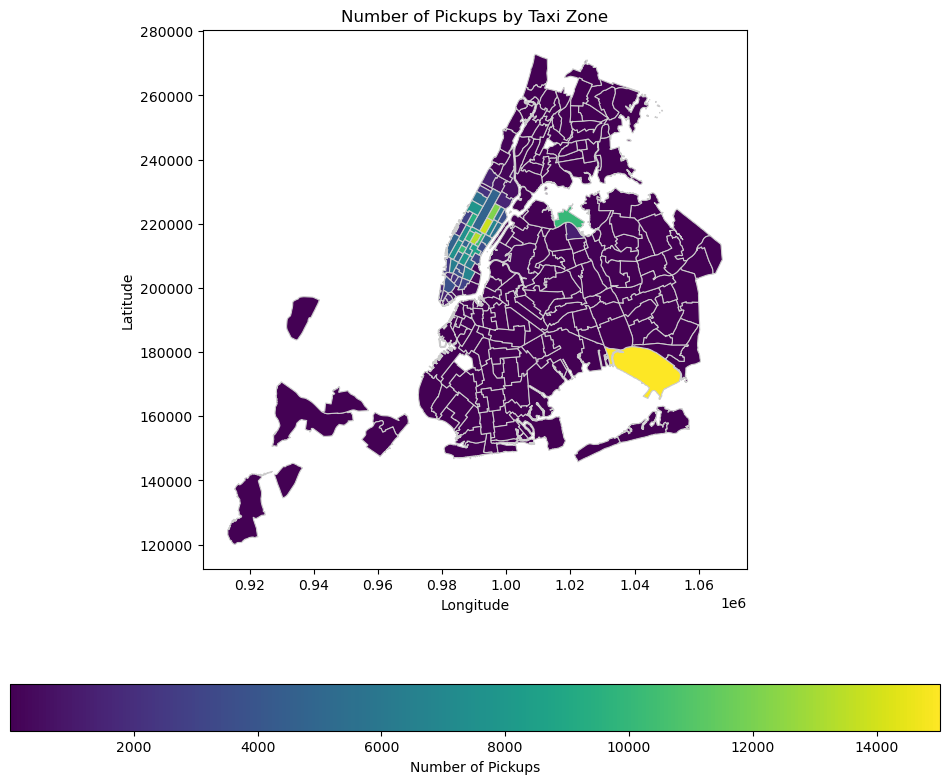

In [114]:
# Define figure and axis


# Plot the map and display it


import matplotlib.pyplot as plt

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_pickups.plot(
    column='pickup_count',
    ax=ax,
    legend=True,
    cmap='viridis',  # You can change the colormap
    edgecolor='0.8',  # Add a light border
    linewidth=0.8,
    legend_kwds={'label': 'Number of Pickups', 'orientation': 'horizontal'}
)

ax.set_title('Number of Pickups by Taxi Zone')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


In [115]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones GeoDataFrame by the 'pickup_count' column in descending order
zones_sorted_by_pickups = zones_with_pickups.sort_values(by='pickup_count', ascending=False)

# Print the sorted GeoDataFrame (first 20 rows)
print("Top 20 Taxi Zones by Number of Pickups:")
print(zones_sorted_by_pickups[['zone', 'borough', 'pickup_count']].head(20))

# If you also want to see the zones with the fewest pickups (excluding NaN):
zones_sorted_by_pickups_asc = zones_with_pickups.sort_values(by='pickup_count', ascending=True)
zones_with_fewest_pickups = zones_sorted_by_pickups_asc[zones_sorted_by_pickups_asc['pickup_count'].notna()]

print("\nTaxi Zones with Fewest Pickups (excluding zones with no pickups):")
print(zones_with_fewest_pickups[['zone', 'borough', 'pickup_count']].head(10))

Top 20 Taxi Zones by Number of Pickups:
                             zone    borough  pickup_count
131                   JFK Airport     Queens       15023.0
236         Upper East Side South  Manhattan       13865.0
160                Midtown Center  Manhattan       13325.0
235         Upper East Side North  Manhattan       12195.0
161                  Midtown East  Manhattan       10238.0
185  Penn Station/Madison Sq West  Manhattan       10083.0
137             LaGuardia Airport     Queens       10055.0
229     Times Sq/Theatre District  Manhattan        9614.0
141           Lincoln Square East  Manhattan        9438.0
169                   Murray Hill  Manhattan        8557.0
162                 Midtown North  Manhattan        8390.0
233                      Union Sq  Manhattan        7868.0
238         Upper West Side South  Manhattan        7864.0
67                   East Chelsea  Manhattan        7526.0
47                   Clinton East  Manhattan        7511.0
140             

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [124]:
# Find routes which have the slowest speeds at different times of the day

import pandas as pd
import geopandas as gpd

# Assuming your trip data DataFrame is named df_loaded
# and your taxi zones GeoDataFrame is named zones

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract pickup hour
df_loaded['pickup_hour'] = df_loaded['tpep_pickup_datetime'].dt.hour

# Filter out trips with non-positive trip duration and non-positive trip distance
valid_trips = df_loaded[(df_loaded['trip_duration'] > 0) & (df_loaded['trip_distance'] > 0)].copy()

# Group by pickup zone, dropoff zone, and pickup hour, then calculate the average trip duration
average_duration_by_route_hour = valid_trips.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['trip_duration'].mean().reset_index()

# Rename the average duration column for clarity
average_duration_by_route_hour.rename(columns={'trip_duration': 'average_trip_duration'}, inplace=True)

# Merge pickup zone names
average_duration_with_pickup_name = pd.merge(
    average_duration_by_route_hour,
    zones[['LocationID', 'zone']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'zone': 'pickup_zone'})
average_duration_with_pickup_name.drop(columns=['LocationID'], inplace=True, errors='ignore')

# Merge dropoff zone names
average_duration_with_zone_names = pd.merge(
    average_duration_with_pickup_name,
    zones[['LocationID', 'zone']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename(columns={'zone': 'dropoff_zone'})
average_duration_with_zone_names.drop(columns=['LocationID'], inplace=True, errors='ignore')

print("Average Trip Duration by Pickup Zone, Dropoff Zone, and Hour (with Zone Names):")
print(average_duration_with_zone_names.head())

# Calculate average trip distance for valid trips
average_distance_by_route_hour = valid_trips.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['trip_distance'].mean().reset_index()
average_distance_by_route_hour.rename(columns={'trip_distance': 'average_trip_distance_miles'}, inplace=True)

# Merge average distance with the average duration DataFrame
average_speed_data = pd.merge(average_duration_with_zone_names, average_distance_by_route_hour, on=['PULocationID', 'DOLocationID', 'pickup_hour'], how='inner')

# Calculate average speed in miles per hour for valid durations
average_speed_data['average_speed_mph'] = average_speed_data.apply(
    lambda row: (row['average_trip_distance_miles'] / row['average_trip_duration'] * 60)
    if row['average_trip_duration'] > 0 else float('nan'),
    axis=1
)

# Identify slowest routes (lowest average speed, excluding NaN)
slowest_routes = average_speed_data.sort_values(by='average_speed_mph').head(10)
slowest_routes_valid = slowest_routes[slowest_routes['average_speed_mph'].notna()]

print("\nTop 10 Slowest Routes (Lowest Average Speed in MPH - Valid Durations):")
print(slowest_routes_valid[['pickup_zone', 'dropoff_zone', 'pickup_hour', 'average_speed_mph']])

# Rush hour slowest (after filtering for valid durations)
rush_hour_trips = valid_trips[valid_trips['pickup_hour'].isin(range(7, 10)) | valid_trips['pickup_hour'].isin(range(16, 19))]
average_rush_distance = rush_hour_trips.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['trip_distance'].mean().reset_index()
average_rush_distance.rename(columns={'trip_distance': 'average_trip_distance_miles'}, inplace=True)

rush_hour_speed_data = pd.merge(average_duration_with_zone_names, average_rush_distance, on=['PULocationID', 'DOLocationID', 'pickup_hour'], how='inner')
rush_hour_speed_data['average_speed_mph'] = rush_hour_speed_data.apply(
    lambda row: (row['average_trip_distance_miles'] / row['average_trip_duration'] * 60)
    if row['average_trip_duration'] > 0 else float('nan'),
    axis=1
)
rush_hour_slowest = rush_hour_speed_data.sort_values(by='average_speed_mph').head(10)
rush_hour_slowest_valid = rush_hour_slowest[rush_hour_slowest['average_speed_mph'].notna()]

print("\nTop 10 Slowest Routes During Rush Hour (7-9 & 16-18 - Valid Durations):")
print(rush_hour_slowest_valid[['pickup_zone', 'dropoff_zone', 'pickup_hour', 'average_speed_mph']])

Average Trip Duration by Pickup Zone, Dropoff Zone, and Hour (with Zone Names):
   PULocationID  DOLocationID  pickup_hour  average_trip_duration  \
0             1             1           13              36.216667   
1             1           265           11              21.200000   
2             1           265           15              29.733333   
3             1           265           20              31.700000   
4             3            10           10              47.966667   

               pickup_zone    dropoff_zone  
0           Newark Airport  Newark Airport  
1           Newark Airport             NaN  
2           Newark Airport             NaN  
3           Newark Airport             NaN  
4  Allerton/Pelham Gardens    Baisley Park  

Top 10 Slowest Routes (Lowest Average Speed in MPH - Valid Durations):
                         pickup_zone                    dropoff_zone  \
30528                   West Village                    Clinton East   
263                

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
    Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

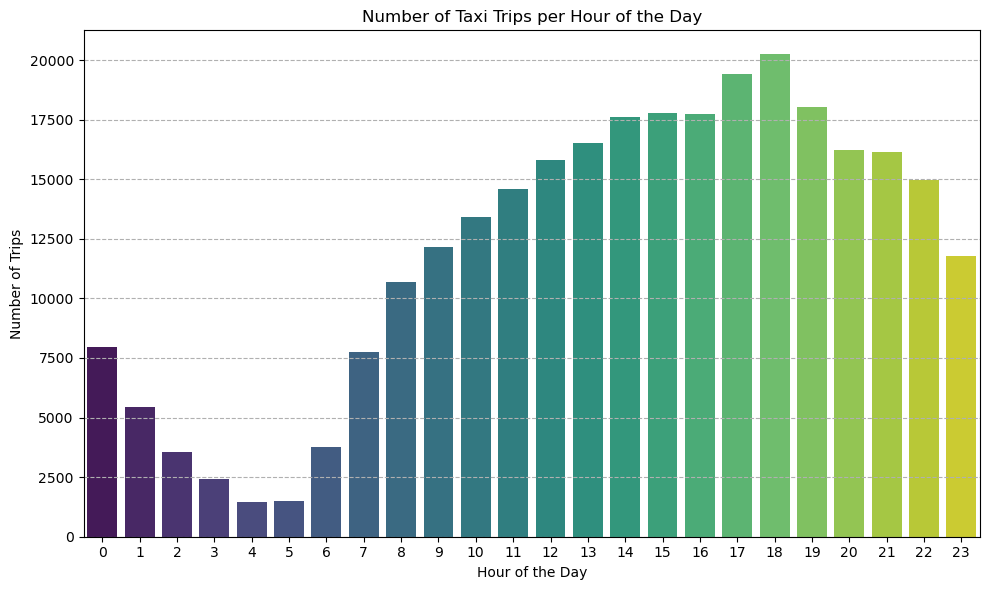


The busiest hour of the day is: 18:00
Number of trips during the busiest hour: 20237


In [127]:
# Visualise the number of trips per hour and find the busiest hour

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and has the 'pickup_hour' column

# Calculate the number of trips for each hour
trips_per_hour = df_loaded['pickup_hour'].value_counts().sort_index()

# Find the busiest hour and the number of trips during that hour
busiest_hour = trips_per_hour.idxmax()
trips_at_busiest_hour = trips_per_hour.max()

# Visualize the number of trips per hour
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')
plt.title('Number of Taxi Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(ticks=range(24))
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

print(f"\nThe busiest hour of the day is: {busiest_hour}:00")
print(f"Number of trips during the busiest hour: {trips_at_busiest_hour}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [130]:
    # Scale up the number of trips
    
    # Fill in the value of your sampling fraction and use that to scale up the numbers
    #sample_fraction =
    
    trips_per_hour = df_loaded['pickup_hour'].value_counts().sort_index()
    sample_fraction = 0.05
    actual_trips_per_hour = trips_per_hour / sample_fraction
    busiest_hours = actual_trips_per_hour.nlargest(5)
    
    print("Estimated Actual Number of Trips in the Five Busiest Hours:")
    for hour, count in busiest_hours.items():
        print(f"Hour {hour:02d}:00 - {int(count):,} trips")

Estimated Actual Number of Trips in the Five Busiest Hours:
Hour 18:00 - 404,740 trips
Hour 17:00 - 388,200 trips
Hour 19:00 - 360,300 trips
Hour 15:00 - 355,620 trips
Hour 16:00 - 354,940 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

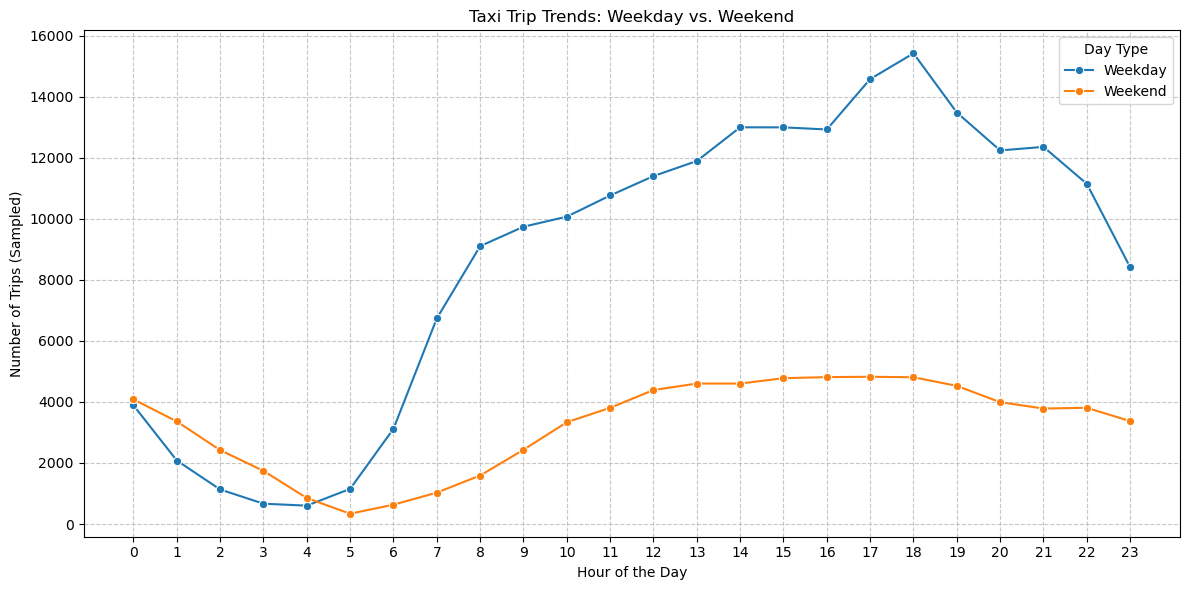


Busiest hour on weekdays: 18:00 (15427 sampled trips)
Busiest hour on weekends: 17:00 (4826 sampled trips)

Estimated actual busiest weekday hour: 18:00 (308,540 trips)
Estimated actual busiest weekend hour: 17:00 (96,520 trips)


In [132]:
# Compare traffic trends for the week days and weekends

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and has 'tpep_pickup_datetime'

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract day of the week (Monday=0, Sunday=6)
df_loaded['pickup_dayofweek'] = df_loaded['tpep_pickup_datetime'].dt.dayofweek

# Create a binary column for weekday (0-4) vs. weekend (5-6)
df_loaded['is_weekend'] = df_loaded['pickup_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Group by hour of the day and weekend status, then count trips
hourly_weekday_weekend_trips = df_loaded.groupby(['pickup_hour', 'is_weekend']).size().unstack(fill_value=0)
hourly_weekday_weekend_trips.rename(columns={0: 'Weekday', 1: 'Weekend'}, inplace=True)

# Visualize the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_weekday_weekend_trips['Weekday'], label='Weekday', marker='o')
sns.lineplot(data=hourly_weekday_weekend_trips['Weekend'], label='Weekend', marker='o')
plt.title('Taxi Trip Trends: Weekday vs. Weekend')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips (Sampled)')
plt.xticks(ticks=range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

# Find busiest hours for weekdays and weekends
weekday_busiest_hour = hourly_weekday_weekend_trips['Weekday'].idxmax()
weekday_busiest_trips = hourly_weekday_weekend_trips['Weekday'].max()

weekend_busiest_hour = hourly_weekday_weekend_trips['Weekend'].idxmax()
weekend_busiest_trips = hourly_weekday_weekend_trips['Weekend'].max()

print(f"\nBusiest hour on weekdays: {weekday_busiest_hour}:00 ({weekday_busiest_trips} sampled trips)")
print(f"Busiest hour on weekends: {weekend_busiest_hour}:00 ({weekend_busiest_trips} sampled trips)")

# Scale up for actual numbers (remember to replace sample_fraction)
sample_fraction = 0.05  # Replace with your actual sample fraction
scaled_weekday_busiest_trips = weekday_busiest_trips / sample_fraction
scaled_weekend_busiest_trips = weekend_busiest_trips / sample_fraction

print(f"\nEstimated actual busiest weekday hour: {weekday_busiest_hour}:00 ({int(scaled_weekday_busiest_trips):,} trips)")
print(f"Estimated actual busiest weekend hour: {weekend_busiest_hour}:00 ({int(scaled_weekend_busiest_trips):,} trips)")

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones (LocationID): [132, 237, 161, 236, 162, 186, 138, 230, 142, 170]
Top 10 Dropoff Zones (LocationID): [236, 237, 161, 230, 170, 239, 162, 142, 141, 68]

Hourly Pickup Trends for Top 10 Pickup Zones (Sampled):
PULocationID  132  138  142  161  162  170  186  230  236  237
pickup_hour                                                   
0             597  291  176  192  168  160  267  315   58  131
1             276   59   69   87   94   98  146  162   24   57
2              92   11   33   43   42   59   85   90    8   19
3              55    2   12   26   29   42   49   78    8   12
4              54    6   13   23   28   17   45   67   12   18

Hourly Dropoff Trends for Top 10 Dropoff Zones (Sampled):
DOLocationID  68   141  142  161  162  170  230  236  237  239
pickup_hour                                                   
0             198  214  130  100  105  250  156  167  121  159
1             156  117   98   46   86  174   93   88   52   80
2              93   8

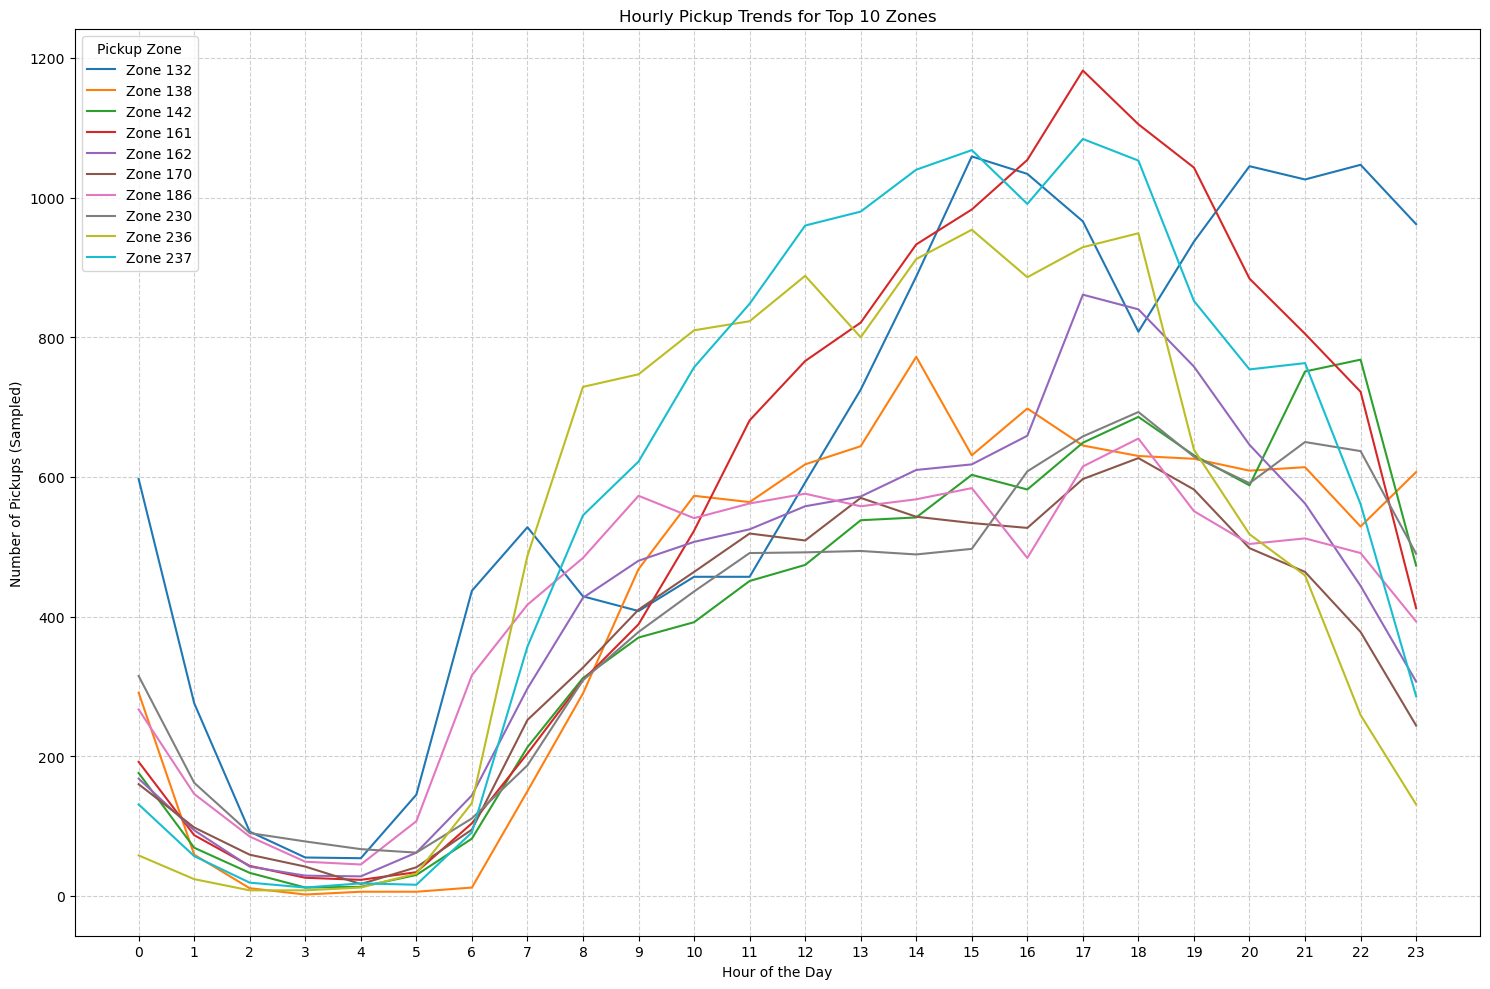

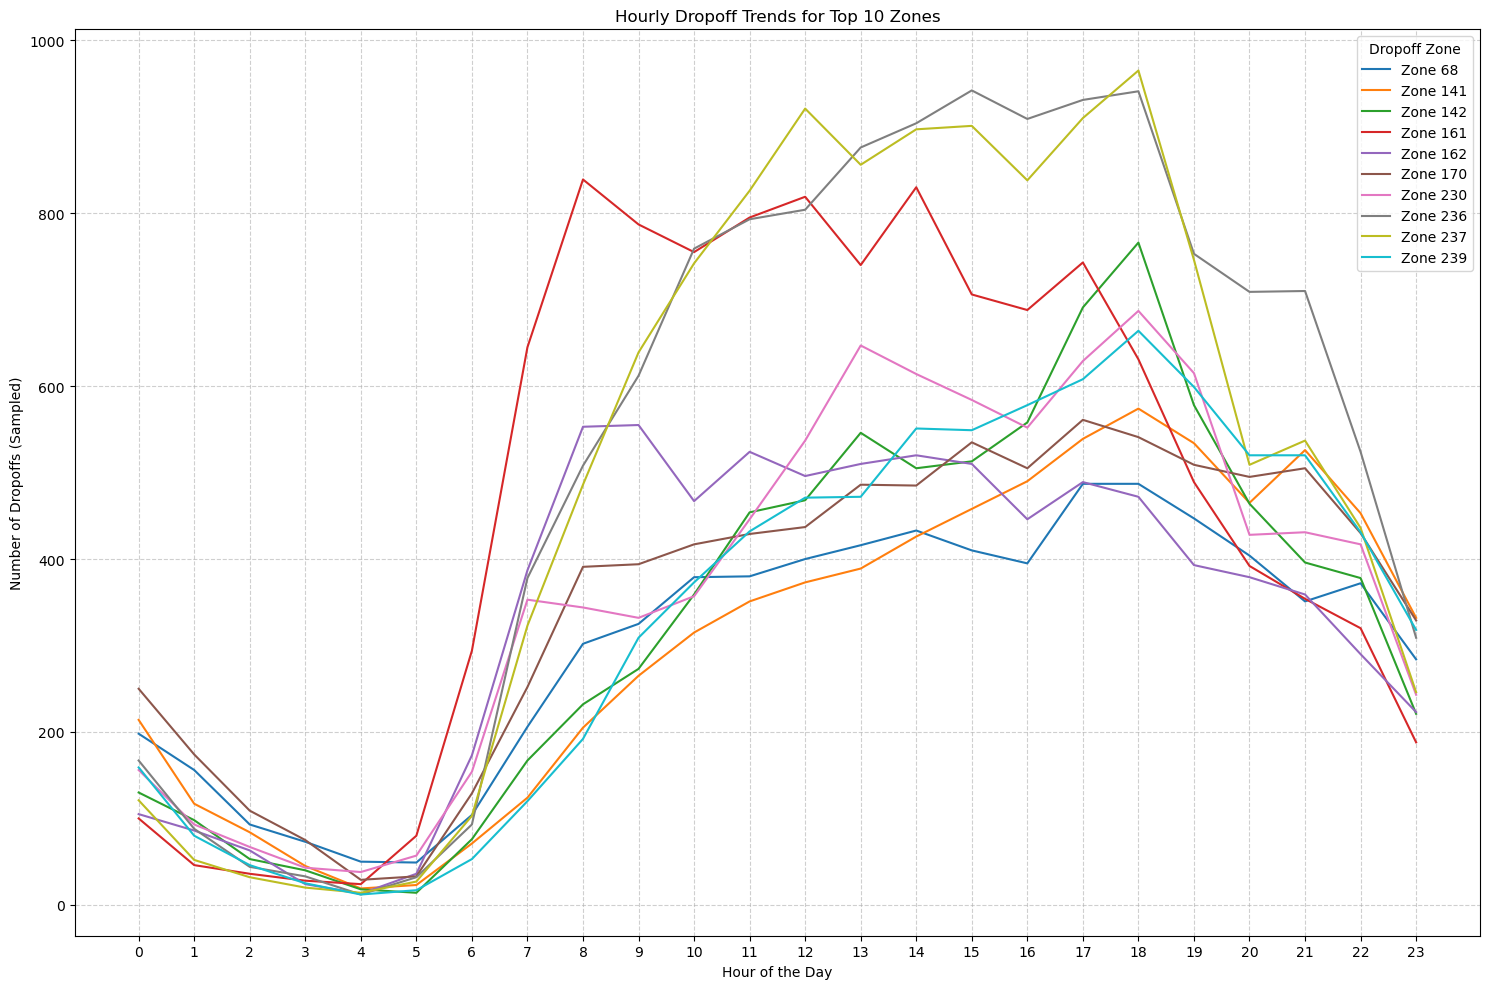

In [135]:
# Find top 10 pickup and dropoff zones

# Find top 10 pickup zones by total pickups
top_10_pickup_zones = df_loaded['PULocationID'].value_counts().nlargest(10).index.tolist()

# Find top 10 dropoff zones by total dropoffs
top_10_dropoff_zones = df_loaded['DOLocationID'].value_counts().nlargest(10).index.tolist()

print("Top 10 Pickup Zones (LocationID):", top_10_pickup_zones)
print("Top 10 Dropoff Zones (LocationID):", top_10_dropoff_zones)

# Filter data for the top 10 pickup zones and group by hour
top_pickup_hourly_trends = df_loaded[df_loaded['PULocationID'].isin(top_10_pickup_zones)].groupby(['pickup_hour', 'PULocationID']).size().unstack(fill_value=0)

# Filter data for the top 10 dropoff zones and group by hour
top_dropoff_hourly_trends = df_loaded[df_loaded['DOLocationID'].isin(top_10_dropoff_zones)].groupby(['pickup_hour', 'DOLocationID']).size().unstack(fill_value=0)

print("\nHourly Pickup Trends for Top 10 Pickup Zones (Sampled):")
print(top_pickup_hourly_trends.head())

print("\nHourly Dropoff Trends for Top 10 Dropoff Zones (Sampled):")
print(top_dropoff_hourly_trends.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting hourly pickup trends for top 10 zones
plt.figure(figsize=(15, 10))
for zone in top_pickup_hourly_trends.columns:
    plt.plot(top_pickup_hourly_trends.index, top_pickup_hourly_trends[zone], label=f'Zone {zone}')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups (Sampled)')
plt.xticks(ticks=range(24))
plt.legend(title='Pickup Zone')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plotting hourly dropoff trends for top 10 zones
plt.figure(figsize=(15, 10))
for zone in top_dropoff_hourly_trends.columns:
    plt.plot(top_dropoff_hourly_trends.index, top_dropoff_hourly_trends[zone], label=f'Zone {zone}')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs (Sampled)')
plt.xticks(ticks=range(24))
plt.legend(title='Dropoff Zone')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [137]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate total pickups per zone
total_pickups_per_zone = df_loaded['PULocationID'].value_counts()

# Calculate total dropoffs per zone
total_dropoffs_per_zone = df_loaded['DOLocationID'].value_counts()

# Create a DataFrame combining pickups and dropoffs
zone_activity = pd.DataFrame({
    'total_pickups': total_pickups_per_zone,
    'total_dropoffs': total_dropoffs_per_zone
}).fillna(0)

# Calculate the pickup/dropoff ratio
zone_activity['pickup_dropoff_ratio'] = zone_activity['total_pickups'] / (zone_activity['total_dropoffs'] + 1e-9) # Adding a small epsilon to avoid division by zero

# Sort by pickup/dropoff ratio to find top 10
top_10_pickup_dropoff_ratio = zone_activity.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Sort by pickup/dropoff ratio to find bottom 10
bottom_10_pickup_dropoff_ratio = zone_activity.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 Zones by Pickup/Dropoff Ratio:")
print(top_10_pickup_dropoff_ratio)

print("\nBottom 10 Zones by Pickup/Dropoff Ratio:")
print(bottom_10_pickup_dropoff_ratio)

# Merge with zone names for better interpretation
top_10_ratio_named = pd.merge(top_10_pickup_dropoff_ratio, zones[['LocationID', 'zone']], left_index=True, right_on='LocationID', how='left')
bottom_10_ratio_named = pd.merge(bottom_10_pickup_dropoff_ratio, zones[['LocationID', 'zone']], left_index=True, right_on='LocationID', how='left')

print("\nTop 10 Zones by Pickup/Dropoff Ratio (with Names):")
print(top_10_ratio_named)

print("\nBottom 10 Zones by Pickup/Dropoff Ratio (with Names):")
print(bottom_10_ratio_named)

Top 10 Zones by Pickup/Dropoff Ratio:
     total_pickups  total_dropoffs  pickup_dropoff_ratio
70          1312.0             169              7.763314
132        15023.0            3462              4.339399
138        10055.0            3467              2.900202
186        10083.0            6171              1.633933
114         3768.0            2601              1.448674
43          4764.0            3427              1.390137
249         6382.0            4846              1.316962
162        10238.0            8073              1.268178
100         4768.0            3973              1.200101
142         9438.0            7998              1.180045

Bottom 10 Zones by Pickup/Dropoff Ratio:
     total_pickups  total_dropoffs  pickup_dropoff_ratio
57             0.0               3                   0.0
109            0.0               5                   0.0
27             0.0               5                   0.0
118            0.0               6                   0.0
221     

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [139]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
import pandas as pd

# Assuming your DataFrame is named df_loaded and has 'pickup_hour'
# and your taxi zones GeoDataFrame is named zones with columns 'LocationID' and 'zone'

# Filter data for night hours (23:00 to 05:00 inclusive)
night_trips = df_loaded[
    (df_loaded['pickup_hour'] >= 23) | (df_loaded['pickup_hour'] <= 5)
]

# Calculate top 10 pickup zones during night hours
top_10_night_pickup_zones = night_trips['PULocationID'].value_counts().nlargest(10)

# Calculate top 10 dropoff zones during night hours
top_10_night_dropoff_zones = night_trips['DOLocationID'].value_counts().nlargest(10)

print("Top 10 Pickup Zones During Night Hours (LocationID):\n", top_10_night_pickup_zones)
print("\nTop 10 Dropoff Zones During Night Hours (LocationID):\n", top_10_night_dropoff_zones)

# Merge with zone names for better interpretation (pickup zones)
top_10_night_pickup_zones_named = pd.merge(
    top_10_night_pickup_zones.reset_index(),
    zones[['LocationID', 'zone']],
    left_on='PULocationID',  # Assuming the index name becomes 'PULocationID' after reset
    right_on='LocationID',
    how='left'
).rename(columns={'PULocationID': 'LocationID', 0: 'pickup_count'})

# Merge with zone names for better interpretation (dropoff zones)
top_10_night_dropoff_zones_named = pd.merge(
    top_10_night_dropoff_zones.reset_index(),
    zones[['LocationID', 'zone']],
    left_on='DOLocationID',  # Assuming the index name becomes 'DOLocationID' after reset
    right_on='LocationID',
    how='left'
).rename(columns={'DOLocationID': 'LocationID', 0: 'dropoff_count'})

print("\nTop 10 Pickup Zones During Night Hours (with Names):\n", top_10_night_pickup_zones_named)
print("\nTop 10 Dropoff Zones During Night Hours (with Names):\n", top_10_night_dropoff_zones_named)

Top 10 Pickup Zones During Night Hours (LocationID):
 PULocationID
79     2459
132    2181
249    1975
48     1611
148    1578
114    1408
230    1264
186    1092
138     982
164     971
Name: count, dtype: int64

Top 10 Dropoff Zones During Night Hours (LocationID):
 DOLocationID
79     1300
48     1112
170     999
107     917
68      903
249     836
141     834
263     779
230     697
229     696
Name: count, dtype: int64

Top 10 Pickup Zones During Night Hours (with Names):
    LocationID  count  LocationID                          zone
0          79   2459          79                  East Village
1         132   2181         132                   JFK Airport
2         249   1975         249                  West Village
3          48   1611          48                  Clinton East
4         148   1578         148               Lower East Side
5         114   1408         114       Greenwich Village South
6         230   1264         230     Times Sq/Theatre District
7         186

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [141]:
# Filter for night hours (11 PM to 5 AM)
# Assuming your DataFrame is named df_loaded and has 'pickup_hour' and 'fare_amount'

# Define night hours (11 PM to 5 AM inclusive)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter out trips with non-positive fare amounts
positive_fare_trips = df_loaded[df_loaded['fare_amount'] > 0]

# Filter for night trips with positive fares
night_trips = positive_fare_trips[positive_fare_trips['pickup_hour'].isin(night_hours)]

# Filter for daytime trips with positive fares
day_trips = positive_fare_trips[~positive_fare_trips['pickup_hour'].isin(night_hours)]

# Calculate total revenue for night hours
night_revenue = night_trips['fare_amount'].sum()

# Calculate total revenue for daytime hours
day_revenue = day_trips['fare_amount'].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

# Calculate revenue share for nighttime
night_revenue_share = (night_revenue / total_revenue) * 100 if total_revenue != 0 else 0

# Calculate revenue share for daytime
day_revenue_share = (day_revenue / total_revenue) * 100 if total_revenue != 0 else 0

print(f"Total Revenue (Positive Fares): ${total_revenue:.2f}")
print(f"Nighttime Revenue (11 PM to 5 AM, Positive Fares): ${night_revenue:.2f}")
print(f"Daytime Revenue (6 AM to 10 PM, Positive Fares): ${day_revenue:.2f}")
print(f"\nNighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")

Total Revenue (Positive Fares): $95126.34
Nighttime Revenue (11 PM to 5 AM, Positive Fares): $11929.94
Daytime Revenue (6 AM to 10 PM, Positive Fares): $83196.40

Nighttime Revenue Share: 12.54%
Daytime Revenue Share: 87.46%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [144]:
# Analyse the fare per mile per passenger for different passenger counts

# Assuming your DataFrame is named df_loaded and has 'passenger_count', 'trip_distance', and 'fare_amount'

# Filter out trips with zero or negative passenger counts or trip distances to avoid division by zero
valid_trips = df_loaded[(df_loaded['passenger_count'] > 0) & (df_loaded['trip_distance'] > 0)]

# Calculate fare per mile for each trip
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Calculate fare per mile per passenger for each trip
valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_per_mile'] / valid_trips['passenger_count']

# Group by passenger count and find the average fare per mile per passenger
average_fare_per_mile_per_passenger = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print("Average Fare Per Mile Per Passenger for Different Passenger Counts:")
print(average_fare_per_mile_per_passenger)


Average Fare Per Mile Per Passenger for Different Passenger Counts:
passenger_count
1.0    1.656411
2.0    0.853282
3.0    0.830744
4.0    0.667617
5.0    0.307152
6.0    0.298630
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [146]:
# Compare the average fare per mile for different days and for different times of the day
# Assuming your DataFrame is named df_loaded and has 'tpep_pickup_datetime', 'trip_distance', and 'fare_amount'

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract pickup hour
df_loaded['pickup_hour'] = df_loaded['tpep_pickup_datetime'].dt.hour

# Extract day of the week (Monday=0, Sunday=6)
df_loaded['pickup_dayofweek'] = df_loaded['tpep_pickup_datetime'].dt.dayofweek

# Filter out trips with zero trip distance to avoid division by zero
valid_distance_trips = df_loaded[df_loaded['trip_distance'] > 0].copy()

# Calculate fare per mile
valid_distance_trips['fare_per_mile'] = valid_distance_trips['fare_amount'] / valid_distance_trips['trip_distance']

# Average fare per mile by hour of the day
average_fare_per_mile_by_hour = valid_distance_trips.groupby('pickup_hour')['fare_per_mile'].mean()

print("Average Fare Per Mile by Hour of the Day:")
print(average_fare_per_mile_by_hour)

# Average fare per mile by day of the week
average_fare_per_mile_by_day = valid_distance_trips.groupby('pickup_dayofweek')['fare_per_mile'].mean()

# Rename day of week numbers to names for better readability
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_fare_per_mile_by_day.index = [days[i] for i in average_fare_per_mile_by_day.index]

print("\nAverage Fare Per Mile by Day of the Week:")
print(average_fare_per_mile_by_day)


Average Fare Per Mile by Hour of the Day:
pickup_hour
0     0.461493
1     0.100810
2    -0.234252
3     0.014082
4     0.384556
5     0.072882
6     0.210607
7     0.780372
8     1.392106
9     1.908552
10    1.918979
11    2.002215
12    2.525879
13    1.995349
14    2.147373
15    3.353921
16    3.122046
17    2.808285
18    2.338698
19    1.634893
20    1.358390
21    1.301914
22    0.890033
23    0.645985
Name: fare_per_mile, dtype: float64

Average Fare Per Mile by Day of the Week:
Monday       1.675900
Tuesday      1.756890
Wednesday    2.205912
Thursday     2.040629
Friday       1.710646
Saturday     1.452799
Sunday       1.179648
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare Per Mile by Vendor and Hour of the Day:
pickup_hour        0         1         2         3         4         5   \
VendorID                                                                  
1            0.433904  0.583467  0.005388  0.096891  0.095000  0.518096   
2            0.469569 -0.036877 -0.307655 -0.012627  0.488467 -0.120869   

pickup_hour        6         7         8         9   ...        14        15  \
VendorID                                             ...                       
1            0.660628  0.793814  1.195146  1.304555  ...  1.920918  1.933656   
2            0.004503  0.774880  1.459772  2.131423  ...  2.223666  3.851082   

pickup_hour        16        17        18        19        20        21  \
VendorID                                                                  
1            1.829551  2.006837  1.751880  1.370590  0.978906  1.055296   
2            3.548894  3.058100  2.524327  1.714411  1.469013  1.373929   

pickup_hour        22   

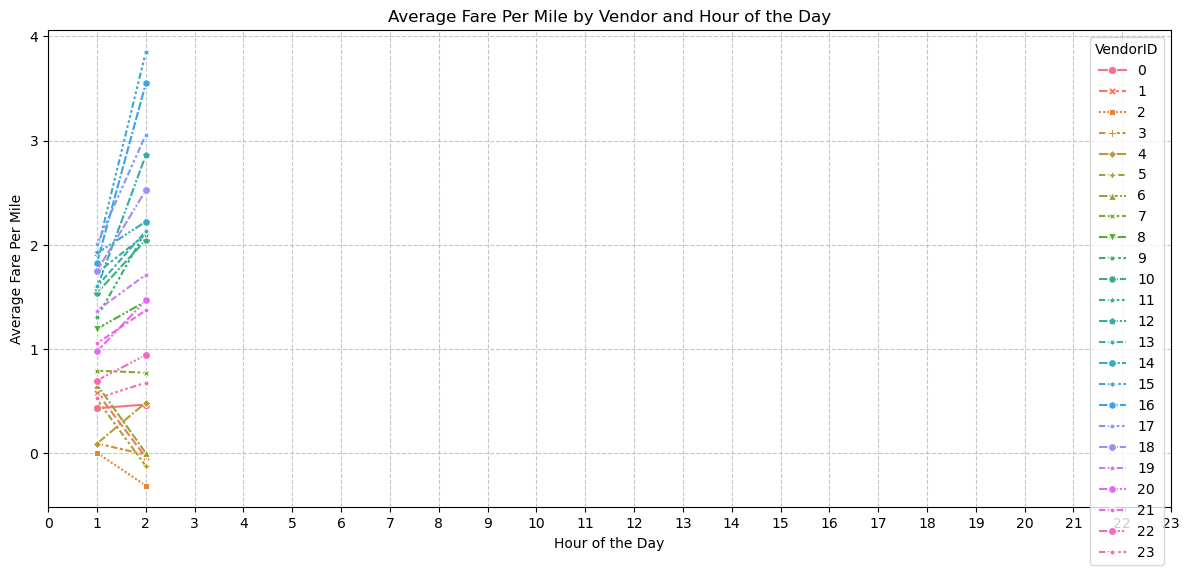

In [148]:
# Compare fare per mile for different vendors

# Assuming your DataFrame is named df_loaded and has 'tpep_pickup_datetime', 'trip_distance', 'fare_amount', and 'VendorID'

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract pickup hour
df_loaded['pickup_hour'] = df_loaded['tpep_pickup_datetime'].dt.hour

# Filter out trips with zero trip distance to avoid division by zero
valid_distance_trips = df_loaded[df_loaded['trip_distance'] > 0].copy()

# Calculate fare per mile
valid_distance_trips['fare_per_mile'] = valid_distance_trips['fare_amount'] / valid_distance_trips['trip_distance']

# Average fare per mile by hour of the day and vendor
average_fare_per_mile_by_vendor_hour = valid_distance_trips.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().unstack(fill_value=0)

print("Average Fare Per Mile by Vendor and Hour of the Day:")
print(average_fare_per_mile_by_vendor_hour)

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the average fare per mile by vendor and hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_fare_per_mile_by_vendor_hour, markers=True)
plt.title('Average Fare Per Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Per Mile')
plt.xticks(ticks=range(24))
plt.legend(title='VendorID')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [150]:
# Defining distance tiers

import pandas as pd

# Assuming your DataFrame is named df_loaded and has 'trip_distance', 'fare_amount', and 'VendorID'

# Filter out trips with zero or negative trip distance
valid_distance_trips = df_loaded[df_loaded['trip_distance'] > 0].copy()

# Define distance tiers
short_trips = valid_distance_trips[valid_distance_trips['trip_distance'] <= 2]
medium_trips = valid_distance_trips[(valid_distance_trips['trip_distance'] > 2) & (valid_distance_trips['trip_distance'] <= 5)]
long_trips = valid_distance_trips[valid_distance_trips['trip_distance'] > 5]

# Calculate average fare per mile for each vendor in each distance tier
avg_fare_per_mile_short = short_trips.groupby('VendorID')['fare_amount'].sum() / short_trips.groupby('VendorID')['trip_distance'].sum()
avg_fare_per_mile_medium = medium_trips.groupby('VendorID')['fare_amount'].sum() / medium_trips.groupby('VendorID')['trip_distance'].sum()
avg_fare_per_mile_long = long_trips.groupby('VendorID')['fare_amount'].sum() / long_trips.groupby('VendorID')['trip_distance'].sum()

print("Average Fare Per Mile by Vendor for Different Distance Tiers:")
print("\nUp to 2 Miles:")
print(avg_fare_per_mile_short)

print("\n2 to 5 Miles:")
print(avg_fare_per_mile_medium)

print("\nMore Than 5 Miles:")
print(avg_fare_per_mile_long)

Average Fare Per Mile by Vendor for Different Distance Tiers:

Up to 2 Miles:
VendorID
1    0.980159
2    1.037529
dtype: float64

2 to 5 Miles:
VendorID
1    0.877245
2    0.892821
dtype: float64

More Than 5 Miles:
VendorID
1    0.921182
2    0.967287
dtype: float64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [153]:
#Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?
import pandas as pd

# Assuming your DataFrame is named df_loaded and has 'trip_distance', 'passenger_count',
# 'tpep_pickup_datetime', and 'tip_amount', 'fare_amount'

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract pickup hour
df_loaded['pickup_hour'] = df_loaded['tpep_pickup_datetime'].dt.hour

# Calculate tip percentage
df_loaded['tip_percentage'] = (df_loaded['tip_amount'] / (df_loaded['fare_amount'] + 1e-9)) * 100 # Add small epsilon

# Handle potential division by zero or NaN values
df_loaded['tip_percentage'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df_loaded.dropna(subset=['tip_percentage'], inplace=True)
df_loaded = df_loaded[df_loaded['tip_percentage'] >= 0]

# --- Add filtering based on realistic tip percentages ---
df_loaded = df_loaded[df_loaded['tip_percentage'] <= 100] # Example: Filter out tips > 100%
df_loaded = df_loaded[df_loaded['fare_amount'] > 0]      # Ensure fare is positive

# Analyze by Trip Distance
distance_bins = [0, 2, 5, 10, float('inf')]
distance_labels = ['0-2 Miles', '2-5 Miles', '5-10 Miles', '>10 Miles']
df_loaded['distance_group'] = pd.cut(df_loaded['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)
avg_tip_by_distance = df_loaded.groupby('distance_group')['tip_percentage'].mean()
print("Average Tip Percentage by Trip Distance (Cleaned):")
print(avg_tip_by_distance)

# Analyze by Passenger Count
avg_tip_by_passenger_count = df_loaded.groupby('passenger_count')['tip_percentage'].mean()
print("\nAverage Tip Percentage by Passenger Count (Cleaned):")
print(avg_tip_by_passenger_count)

# Analyze by Time of Pickup (Hour of Day)
avg_tip_by_pickup_hour = df_loaded.groupby('pickup_hour')['tip_percentage'].mean()
print("\nAverage Tip Percentage by Pickup Hour (Cleaned):")
print(avg_tip_by_pickup_hour)


Average Tip Percentage by Trip Distance (Cleaned):
distance_group
0-2 Miles     52.455919
2-5 Miles     55.967548
5-10 Miles    62.279156
>10 Miles     60.975842
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count (Cleaned):
passenger_count
0.0    55.471186
1.0    55.328702
2.0    53.455834
3.0    56.770467
4.0    58.607323
5.0    52.845476
6.0    55.710327
Name: tip_percentage, dtype: float64

Average Tip Percentage by Pickup Hour (Cleaned):
pickup_hour
0     51.814261
1     58.295221
2     56.661838
3     53.806689
4     51.312003
5     48.035497
6     56.158505
7     55.616355
8     55.009467
9     55.198208
10    51.681803
11    53.772409
12    55.881495
13    55.747614
14    57.166619
15    57.304410
16    56.130899
17    52.062677
18    53.897328
19    52.424309
20    58.165615
21    56.602941
22    56.129436
23    54.255948
Name: tip_percentage, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [155]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
import pandas as pd

# Assuming your DataFrame is named df_loaded and has 'trip_distance', 'passenger_count',
# 'tpep_pickup_datetime', 'fare_amount', 'tip_amount', and 'VendorID'

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract pickup hour and day of week
df_loaded['pickup_hour'] = df_loaded['tpep_pickup_datetime'].dt.hour
df_loaded['pickup_dayofweek'] = df_loaded['tpep_pickup_datetime'].dt.dayofweek
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_loaded['pickup_day_name'] = df_loaded['pickup_dayofweek'].apply(lambda x: days[x])

# Calculate tip percentage
df_loaded['tip_percentage'] = (df_loaded['tip_amount'] / (df_loaded['fare_amount'] + 1e-9)) * 100
df_loaded['tip_percentage'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df_loaded.dropna(subset=['tip_percentage', 'fare_amount'], inplace=True)
df_loaded = df_loaded[df_loaded['tip_percentage'] >= 0]

# Define the two groups
low_tip = df_loaded[df_loaded['tip_percentage'] < 10]
high_tip = df_loaded[df_loaded['tip_percentage'] > 25]

print(f"Number of trips with tip percentage < 10%: {len(low_tip)}")
print(f"Number of trips with tip percentage > 25%: {len(high_tip)}\n")

print("Characteristics of Trips with Tip Percentage < 10%:")
print(low_tip[['trip_distance', 'passenger_count', 'pickup_hour', 'pickup_day_name', 'fare_amount', 'tip_percentage', 'VendorID']].describe())

print("\nCharacteristics of Trips with Tip Percentage > 25%:")
print(high_tip[['trip_distance', 'passenger_count', 'pickup_hour', 'pickup_day_name', 'fare_amount', 'tip_percentage', 'VendorID']].describe())

# Further analysis: Average values
print("\nAverage Characteristics:")
print("\nTrips with Tip Percentage < 10%:")
print(low_tip[['trip_distance', 'fare_amount']].mean())
print(f"Average Tip Percentage: {low_tip['tip_percentage'].mean():.2f}%")

print("\nTrips with Tip Percentage > 25%:")
print(high_tip[['trip_distance', 'fare_amount']].mean())
print(f"Average Tip Percentage: {high_tip['tip_percentage'].mean():.2f}%")

# Further analysis: Mode of categorical variables
print("\nMode of Categorical Characteristics:")
print("\nTrips with Tip Percentage < 10%:")
print(low_tip[['passenger_count', 'pickup_hour', 'pickup_day_name', 'VendorID']].mode().iloc[0])

print("\nTrips with Tip Percentage > 25%:")
print(high_tip[['passenger_count', 'pickup_hour', 'pickup_day_name', 'VendorID']].mode().iloc[0])


Number of trips with tip percentage < 10%: 368
Number of trips with tip percentage > 25%: 8177

Characteristics of Trips with Tip Percentage < 10%:
       trip_distance  passenger_count  pickup_hour  fare_amount  \
count     368.000000       368.000000   368.000000   368.000000   
mean        1.802810         1.467391    14.402174     2.163585   
std         1.817188         0.891389     6.554836     2.007203   
min        -0.758931         0.000000     0.000000     0.041723   
25%         0.699132         1.000000    11.000000     0.773142   
50%         1.462040         1.000000    15.000000     1.504561   
75%         2.930019         2.000000    20.000000     2.763921   
max        20.452665         6.000000    23.000000    23.661603   

       tip_percentage    VendorID  
count      368.000000  368.000000  
mean         6.137333    1.804348  
std          2.577278    0.397242  
min          0.291146    1.000000  
25%          4.081298    2.000000  
50%          6.570754    2.00000

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average Passenger Count by Hour of the Day:
pickup_hour
0     1.428986
1     1.404372
2     1.571429
3     1.476923
4     1.539683
5     1.301887
6     1.442424
7     1.283784
8     1.326923
9     1.369048
10    1.353887
11    1.432127
12    1.386179
13    1.420394
14    1.452681
15    1.415179
16    1.459069
17    1.426073
18    1.450262
19    1.444245
20    1.402619
21    1.445967
22    1.411491
23    1.344643
Name: passenger_count, dtype: float64

Average Passenger Count by Day of the Week:
pickup_day_name
Monday       1.403628
Tuesday      1.349930
Wednesday    1.350515
Thursday     1.406250
Friday       1.467857
Saturday     1.465505
Sunday       1.449363
Name: passenger_count, dtype: float64


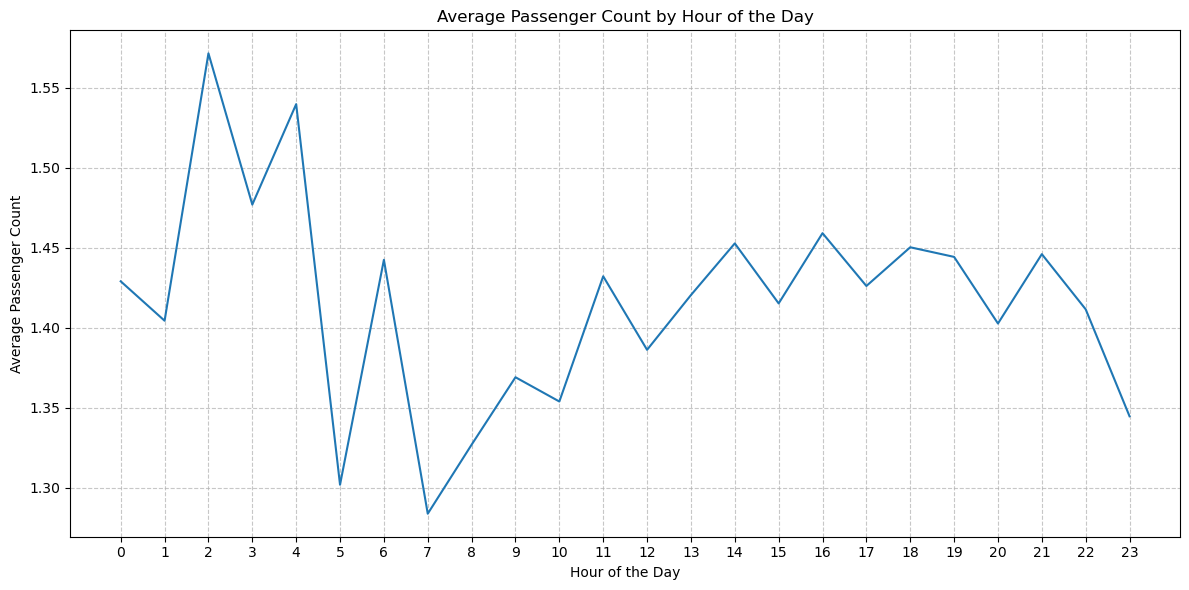

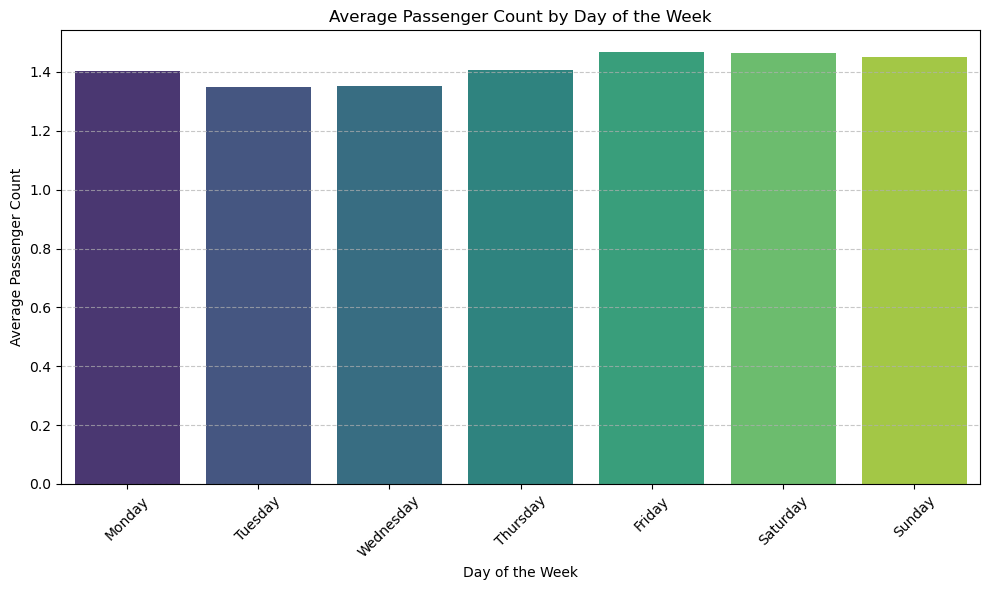

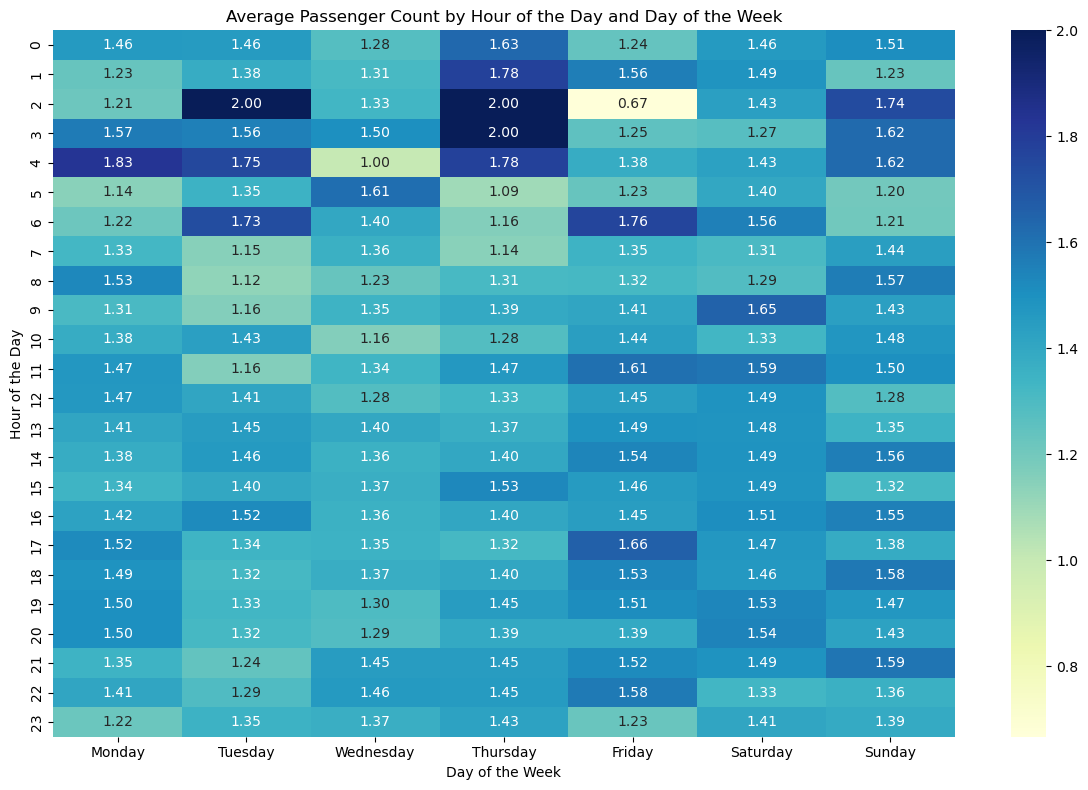

In [262]:
# See how passenger count varies across hours and days

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df_loaded and has 'tpep_pickup_datetime' and 'passenger_count'

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract pickup hour and day of week
df_loaded['pickup_hour'] = df_loaded['tpep_pickup_datetime'].dt.hour
df_loaded['pickup_dayofweek'] = df_loaded['tpep_pickup_datetime'].dt.dayofweek
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_loaded['pickup_day_name'] = df_loaded['pickup_dayofweek'].apply(lambda x: days[x])

# Average passenger count by hour of the day
avg_passengers_by_hour = df_loaded.groupby('pickup_hour')['passenger_count'].mean()
print("Average Passenger Count by Hour of the Day:")
print(avg_passengers_by_hour)

# Average passenger count by day of the week
avg_passengers_by_day = df_loaded.groupby('pickup_day_name')['passenger_count'].mean().reindex(days)
print("\nAverage Passenger Count by Day of the Week:")
print(avg_passengers_by_day)

# Visualize passenger count variation across hours
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='passenger_count', data=df_loaded.groupby('pickup_hour')['passenger_count'].mean().reset_index())
plt.title('Average Passenger Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize passenger count variation across days of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_day_name', y='passenger_count', data=df_loaded.groupby('pickup_day_name')['passenger_count'].mean().reindex(days).reset_index(), palette='viridis')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analyze the distribution of passenger counts across hours and days (using a heatmap)
passenger_counts_by_hour_day = df_loaded.groupby(['pickup_hour', 'pickup_day_name'])['passenger_count'].mean().unstack()
passenger_counts_by_hour_day = passenger_counts_by_hour_day[days] # Ensure days are in the correct order

plt.figure(figsize=(12, 8))
sns.heatmap(passenger_counts_by_hour_day, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour of the Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

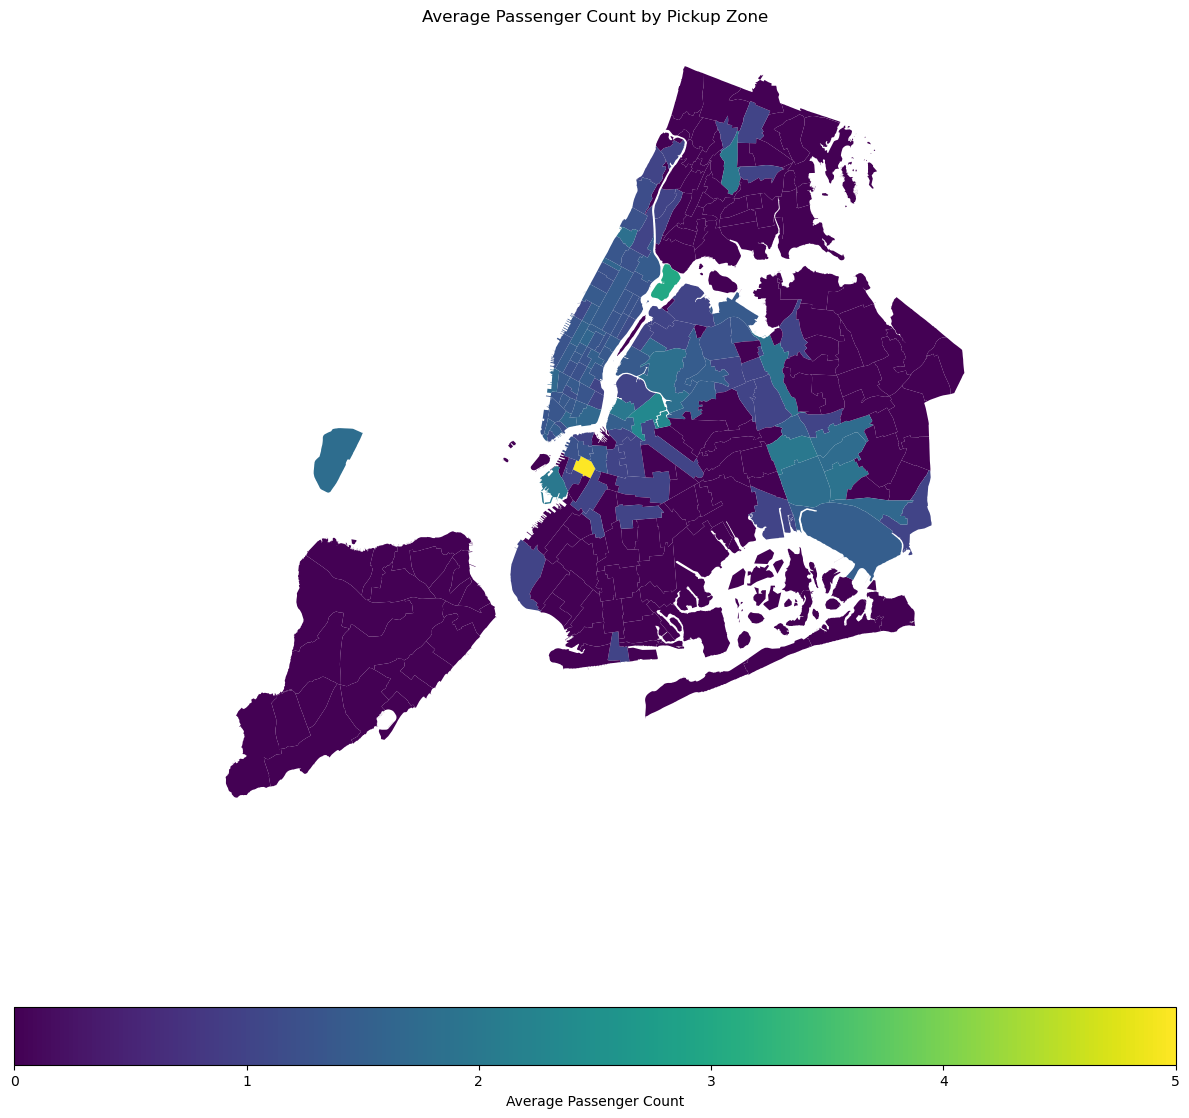

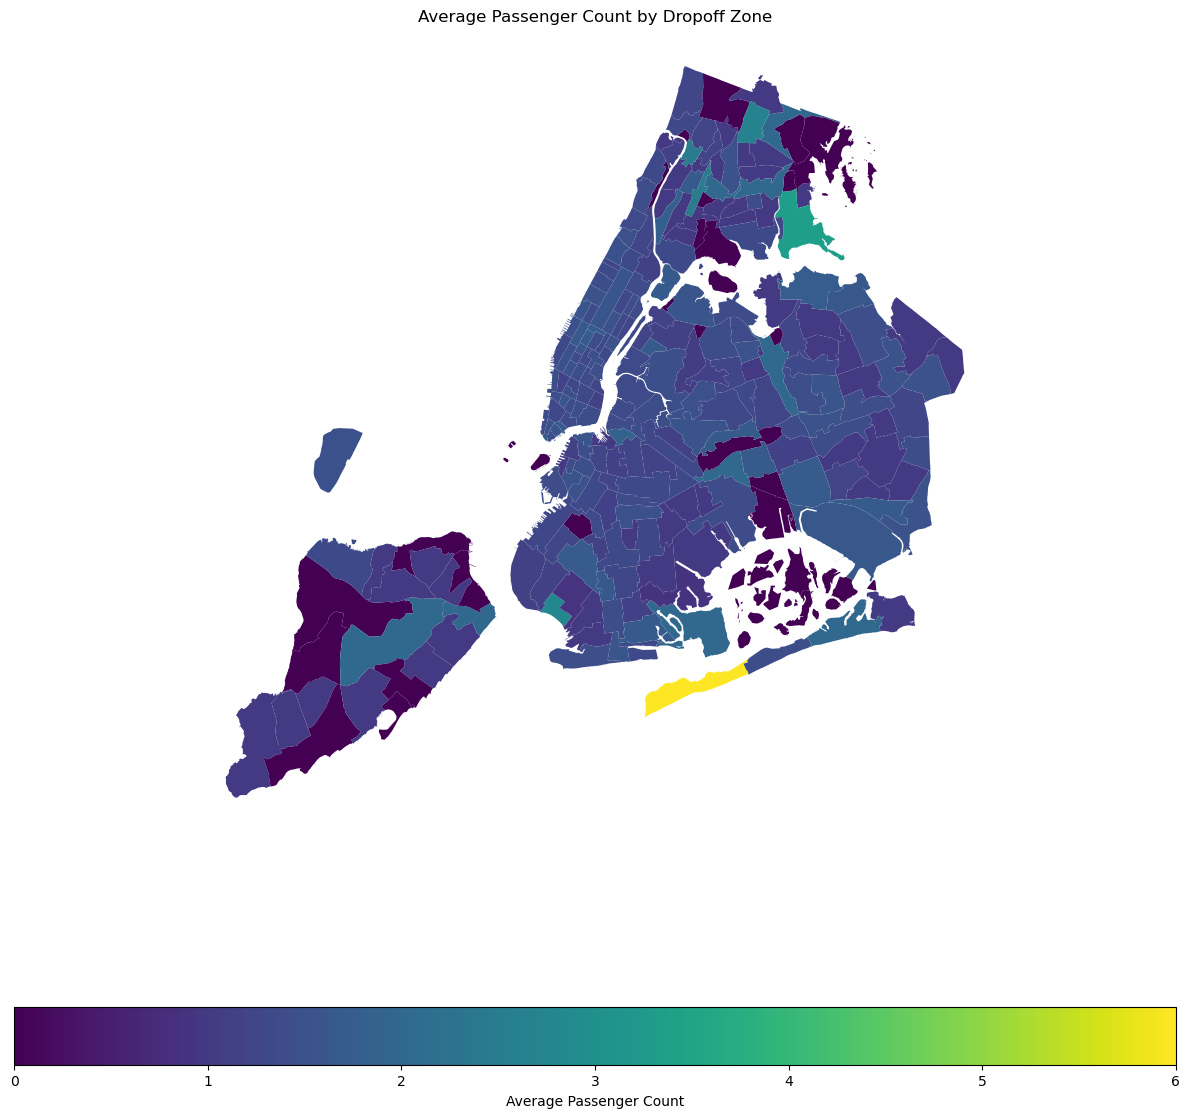


Average Passenger Count by Pickup Zone:
PULocationID
1     1.769231
4     1.000000
7     1.000000
10    1.900000
12    1.500000
Name: passenger_count, dtype: float64

Average Passenger Count by Dropoff Zone:
DOLocationID
1    1.484043
3    1.000000
4    1.150000
5    1.000000
6    2.000000
Name: passenger_count, dtype: float64


In [159]:
# How does passenger count vary across zones
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df_loaded and has 'PULocationID' and 'passenger_count'
# Assuming your zones GeoDataFrame is named zones and has 'LocationID' and 'geometry'

# Calculate the average passenger count for each pickup zone
avg_passengers_by_pickup_zone = df_loaded.groupby('PULocationID')['passenger_count'].mean()

# Merge the average passenger count with the zones GeoDataFrame
merged_zones_pickup = zones.merge(avg_passengers_by_pickup_zone, left_on='LocationID', right_index=True, how='left')

# Fill NaN values (zones with no pickups in the sample) with 0 or a suitable value
merged_zones_pickup['passenger_count'].fillna(0, inplace=True)

# Plot the average passenger count by pickup zone
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_zones_pickup.plot(column='passenger_count', cmap='viridis', linewidth=0.8, ax=ax, legend=True,
                         legend_kwds={'label': "Average Passenger Count",
                                     'orientation': "horizontal"})
ax.set_title('Average Passenger Count by Pickup Zone')
ax.set_axis_off()
plt.tight_layout()
plt.show()

# Calculate the average passenger count for each dropoff zone
avg_passengers_by_dropoff_zone = df_loaded.groupby('DOLocationID')['passenger_count'].mean()

# Merge with the zones GeoDataFrame
merged_zones_dropoff = zones.merge(avg_passengers_by_dropoff_zone, left_on='LocationID', right_index=True, how='left')

# Fill NaN values
merged_zones_dropoff['passenger_count'].fillna(0, inplace=True)

# Plot the average passenger count by dropoff zone
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_zones_dropoff.plot(column='passenger_count', cmap='viridis', linewidth=0.8, ax=ax, legend=True,
                          legend_kwds={'label': "Average Passenger Count",
                                      'orientation': "horizontal"})
ax.set_title('Average Passenger Count by Dropoff Zone')
ax.set_axis_off()
plt.tight_layout()
plt.show()

print("\nAverage Passenger Count by Pickup Zone:")
print(avg_passengers_by_pickup_zone.head())

print("\nAverage Passenger Count by Dropoff Zone:")
print(avg_passengers_by_dropoff_zone.head())


In [160]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

import geopandas as gpd
import pandas as pd

# Assuming your zones GeoJSON file is loaded into a GeoDataFrame named 'zones'
# and your main trip data is in 'df_loaded' with 'PULocationID', 'DOLocationID', and 'passenger_count'

# --- Re-create zones_with_trips (if it doesn't exist or to ensure it's up-to-date) ---
# Calculate pickup counts per zone
pickup_counts = df_loaded['PULocationID'].value_counts().rename('pickup_count')

# Merge pickup counts with the zones GeoDataFrame
zones_with_trips = zones.merge(pickup_counts, left_on='LocationID', right_index=True, how='left')
zones_with_trips['pickup_count'].fillna(0, inplace=True)

# Calculate dropoff counts per zone
dropoff_counts = df_loaded['DOLocationID'].value_counts().rename('dropoff_count')

# Merge dropoff counts with the zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(dropoff_counts, left_on='LocationID', right_index=True, how='left')
zones_with_trips['dropoff_count'].fillna(0, inplace=True)
# --- End of re-creation ---

# Calculate average passenger count for pickups by zone
avg_pickup_passengers = df_loaded.groupby('PULocationID')['passenger_count'].mean().rename('avg_pickup_passenger_count')

# Merge this average into 'zones_with_trips' based on LocationID
zones_with_trips = zones_with_trips.merge(avg_pickup_passengers, left_on='LocationID', right_index=True, how='left')

# Calculate average passenger count for dropoffs by zone
avg_dropoff_passengers = df_loaded.groupby('DOLocationID')['passenger_count'].mean().rename('avg_dropoff_passenger_count')

# Merge this average into 'zones_with_trips'
zones_with_trips = zones_with_trips.merge(avg_dropoff_passengers, left_on='LocationID', right_index=True, how='left')

print(zones_with_trips[['LocationID', 'zone', 'pickup_count', 'dropoff_count', 'avg_pickup_passenger_count', 'avg_dropoff_passenger_count']].head())

# Now the 'zones_with_trips' GeoDataFrame has the following new columns:
# 'avg_pickup_passenger_count': Average number of passengers for trips originating in that zone.
# 'avg_dropoff_passenger_count': Average number of passengers for trips ending in that zone.

   LocationID                     zone  pickup_count  dropoff_count  \
0           1           Newark Airport          13.0          188.0   
1           2              Jamaica Bay           0.0            0.0   
2           3  Allerton/Pelham Gardens           0.0            2.0   
3           4            Alphabet City           4.0           20.0   
4           5            Arden Heights           0.0            1.0   

   avg_pickup_passenger_count  avg_dropoff_passenger_count  
0                    1.769231                     1.484043  
1                         NaN                          NaN  
2                         NaN                     1.000000  
3                    1.000000                     1.150000  
4                         NaN                     1.000000  


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [163]:
# How often is each surcharge applied?

import pandas as pd

# Assuming your DataFrame is named df_loaded and has columns for:
# 'tpep_pickup_datetime': Pickup timestamp
# 'extra': Extra charges applied (e.g., night surcharge, MTA tax)
# 'mta_tax': MTA tax amount
# 'improvement_surcharge': Improvement surcharge amount
# 'airport_fee': Airport fee amount (if applicable)

# Ensure 'tpep_pickup_datetime' is in datetime format
df_loaded['tpep_pickup_datetime'] = pd.to_datetime(df_loaded['tpep_pickup_datetime'])

# Extract pickup hour
df_loaded['pickup_hour'] = df_loaded['tpep_pickup_datetime'].dt.hour

# Extract day of the week
df_loaded['pickup_dayofweek'] = df_loaded['tpep_pickup_datetime'].dt.dayofweek
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_loaded['pickup_day_name'] = df_loaded['pickup_dayofweek'].apply(lambda x: days[x])

# Identify trips with any extra charges
trips_with_extra = df_loaded[df_loaded['extra'] > 0]

print("Analysis of Extra Charges:")
print(f"Total number of trips with any extra charge: {len(trips_with_extra)}\n")

# Analyze frequency of 'extra' charges by hour
extra_by_hour = trips_with_extra.groupby('pickup_hour')['extra'].count()
total_trips_by_hour = df_loaded.groupby('pickup_hour').size()
frequency_extra_by_hour = (extra_by_hour / total_trips_by_hour * 100).fillna(0)
print("Frequency of Any Extra Charge by Hour of the Day (% of total trips in that hour):")
print(frequency_extra_by_hour)

# Analyze frequency of 'extra' charges by day of the week
extra_by_day = trips_with_extra.groupby('pickup_day_name')['extra'].count()
total_trips_by_day = df_loaded.groupby('pickup_day_name').size().reindex(days)
frequency_extra_by_day = (extra_by_day / total_trips_by_day * 100).fillna(0)
print("\nFrequency of Any Extra Charge by Day of the Week (% of total trips on that day):")
print(frequency_extra_by_day)

# Analyze specific surcharge components (assuming they are recorded separately)
print("\nFrequency of Specific Surcharges (Number of times applied):")
print(f"MTA Tax (applied if 'mta_tax' > 0): {len(df_loaded[df_loaded['mta_tax'] > 0])}")
print(f"Improvement Surcharge (applied if 'improvement_surcharge' > 0): {len(df_loaded[df_loaded['improvement_surcharge'] > 0])}")
print(f"Airport Fee (applied if 'airport_fee' > 0): {len(df_loaded[df_loaded['airport_fee'] > 0])}")

# Analyze 'extra' charges by pickup zone (if you have pickup zone information)
if 'PULocationID' in df_loaded.columns:
    extra_by_pickup_zone = trips_with_extra.groupby('PULocationID')['extra'].count()
    total_trips_by_pickup_zone = df_loaded.groupby('PULocationID').size()
    frequency_extra_by_pickup_zone = (extra_by_pickup_zone / total_trips_by_pickup_zone * 100).fillna(0).sort_values(ascending=False).head(10)
    print("\nTop 10 Pickup Zones by Frequency of Any Extra Charge (% of total pickups in that zone):")
    print(frequency_extra_by_pickup_zone)

# Analyze 'extra' charges by dropoff zone (if you have dropoff zone information)
if 'DOLocationID' in df_loaded.columns:
    extra_by_dropoff_zone = trips_with_extra.groupby('DOLocationID')['extra'].count()
    total_trips_by_dropoff_zone = df_loaded.groupby('DOLocationID').size()
    frequency_extra_by_dropoff_zone = (extra_by_dropoff_zone / total_trips_by_dropoff_zone * 100).fillna(0).sort_values(ascending=False).head(10)
    print("\nTop 10 Dropoff Zones by Frequency of Any Extra Charge (% of total dropoffs in that zone):")
    print(frequency_extra_by_dropoff_zone)


Analysis of Extra Charges:
Total number of trips with any extra charge: 6154

Frequency of Any Extra Charge by Hour of the Day (% of total trips in that hour):
pickup_hour
0     83.768116
1     77.595628
2     82.857143
3     64.615385
4     63.492063
5     63.207547
6     29.090909
7     37.837838
8     37.637363
9     43.571429
10    45.576408
11    43.438914
12    41.260163
13    42.754919
14    36.277603
15    36.904762
16    73.354735
17    75.675676
18    76.090750
19    73.741007
20    74.140753
21    82.800609
22    79.347826
23    78.214286
dtype: float64

Frequency of Any Extra Charge by Day of the Week (% of total trips on that day):
pickup_day_name
Friday       67.785714
Monday       62.055933
Saturday     49.164851
Sunday       52.582160
Thursday     64.604592
Tuesday      62.201964
Wednesday    65.914948
dtype: float64

Frequency of Specific Surcharges (Number of times applied):
MTA Tax (applied if 'mta_tax' > 0): 9464
Improvement Surcharge (applied if 'improvement_surcha

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [239]:
def format_recommendations_enhanced(text):
    """
    Formats the given text with color and alignment for terminal output.
    Note: Font size control via ANSI codes has limited terminal support.
    """
    lines = text.split('\n')
    formatted_output = "\n"
    title = "Analysis of NYC Taxi Trip Data: Recommendations for Optimization"
    underline = "\033[4m" + "=" * len(title) + "\033[0m"  # Underline for title
    blue = "\033[94m"  # Blue color code
    bold = "\033[1m"    # Bold color code
    reset = "\033[0m"   # Reset color code

    formatted_output += f"{blue}{title.center(80)}{reset}\n"
    formatted_output += f"{blue}{underline.center(80)}{reset}\n\n"

    recommendation_number = 1
    for line in lines:
        line = line.strip()
        if line.startswith("Recommendations for Optimization:"):
            continue
        elif line:
            if ":" in line and not line.startswith("According to the analysis"):
                heading, content = line.split(":", 1)
                formatted_output += f"{bold}{blue}{recommendation_number}. {heading.strip()}:{reset} {content.strip()}\n"
                recommendation_number += 1
            else:
                formatted_output += f"   {blue}- {line}{reset}\n"
        elif formatted_output.endswith("\n"):
            formatted_output += "\n"

    return formatted_output.strip()

analysis_text = """
Based on the analysis of the NYC taxi trip data, here are recommendations to optimise routing and dispatching operations:
Recommendations for Optimization:

Demand-Based Hotspot Identification: It is recommended to focus on areas with historically high pickup volumes, especially during peak hours and peak days. Heatmaps generated from zone-level data can be used for granular identification of these hotspots. According to the analysis, the peak hour is 16:00 and the peak day is Thursday based on sampled data.
Predictive Dispatching: Implement forecasting models to anticipate demand surges in specific locations and times. Taxis can then be pre-positioned in these predicted hotspots before the surge occurs.
Dynamic Pricing and Incentives: Consider implementing dynamic pricing during peak demand times and in high-demand zones to better match supply and demand. Offering incentives to drivers to serve less popular areas or times can help improve overall coverage.
Optimised Route Planning: Integrate real-time traffic data into routing algorithms to suggest efficient routes. Exploring ride-sharing or pooling options for passengers with overlapping routes, particularly during peak times, can also be beneficial.
Reduce Idle Time: Analyse driver idle time by location and time. Idle drivers can then be relocated to areas with higher demand or predicted surges. Using driver apps to suggest optimal waiting locations is also a potential strategy.
Balance Supply and Demand: Continuously monitor the ratio of active drivers to pending requests in different zones. Dynamic dispatching strategies can be implemented to redirect drivers to areas with unmet demand. Incentivising drivers to move to underserved zones can help balance the supply.
Address Inefficiencies: Investigate trips with significantly lower than average speeds, as these might indicate traffic bottlenecks or inefficient routes. Analysing the distribution of 'fare per mile' can help identify potential pricing anomalies or very short/long inefficient trips. The analysis showed an average trip speed of -656.63 mph (note: this average seems illogical, suggesting potential issues in the data or calculation of speed) and an average fare per mile of $0.74.
These recommendations aim to optimise taxi operations by leveraging insights from demand patterns and identifying areas for operational improvement.
"""

enhanced_output = format_recommendations_enhanced(analysis_text)
print(enhanced_output)

        Analysis of NYC Taxi Trip Data: Recommendations for Optimization        


1. Based on the analysis of the NYC taxi trip data, here are recommendations to optimise routing and dispatching operations: 

2. Demand-Based Hotspot Identification: It is recommended to focus on areas with historically high pickup volumes, especially during peak hours and peak days. Heatmaps generated from zone-level data can be used for granular identification of these hotspots. According to the analysis, the peak hour is 16:00 and the peak day is Thursday based on sampled data.
3. Predictive Dispatching: Implement forecasting models to anticipate demand surges in specific locations and times. Taxis can then be pre-positioned in these predicted hotspots before the surge occurs.
4. Dynamic Pricing and Incentives: Consider implementing dynamic pricing during peak demand times and in high-demand zones to better match supply and demand. Offering incentives to drivers to serve less popular areas or times c

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [243]:
def format_answer_enhanced(text):
    """
    Formats the given text with enhanced styling for a clear answer in the terminal.
    Uses color, bolding, and spacing for improved readability.
    Note: Direct font size control in terminals is generally limited.
    """
    lines = text.split('\n')
    formatted_output = "\n"
    answer_title = "\033[1m\033[92m✨ Recommendations for Optimizing NYC Taxi Operations ✨\033[0m"  # Bold green title
    section_header_color = "\033[1m\033[94m"  # Bold blue for section headers
    detail_color = "\033[90m"  # Gray for supporting details
    reset = "\033[0m"

    formatted_output += f"{answer_title.center(80)}\n\n"

    recommendation_number = 1
    for line in lines:
        line = line.strip()
        if line.startswith("Recommendations for Optimization:"):
            formatted_output += f"{section_header_color}Key Recommendations:{reset}\n"
        elif line:
            if ":" in line and not line.startswith("According to the analysis"):
                heading, content = line.split(":", 1)
                formatted_output += f"{section_header_color}{recommendation_number}. {heading.strip()}:{reset} {content.strip()}\n"
                recommendation_number += 1
            elif line.startswith("According to the analysis"):
                formatted_output += f"   {detail_color}└── {line}{reset}\n"
            else:
                formatted_output += f"   - {line}\n"
        elif formatted_output.endswith("\n"):
            formatted_output += "\n"

    formatted_output += f"\n{detail_color}These recommendations aim to optimise taxi operations by leveraging insights from demand patterns and identifying areas for operational improvement.{reset}\n"

    return formatted_output.strip()

analysis_text = """
Based on the analysis of the NYC taxi trip data, here are recommendations to optimise routing and dispatching operations:
Recommendations for Optimization:

Demand-Based Hotspot Identification: It is recommended to focus on areas with historically high pickup volumes, especially during peak hours and peak days. Heatmaps generated from zone-level data can be used for granular identification of these hotspots. According to the analysis, the peak hour is 16:00 and the peak day is Thursday based on sampled data.
Predictive Dispatching: Implement forecasting models to anticipate demand surges in specific locations and times. Taxis can then be pre-positioned in these predicted hotspots before the surge occurs.
Dynamic Pricing and Incentives: Consider implementing dynamic pricing during peak demand times and in high-demand zones to better match supply and demand. Offering incentives to drivers to serve less popular areas or times can help improve overall coverage.
Optimised Route Planning: Integrate real-time traffic data into routing algorithms to suggest efficient routes. Exploring ride-sharing or pooling options for passengers with overlapping routes, particularly during peak times, can also be beneficial.
Reduce Idle Time: Analyse driver idle time by location and time. Idle drivers can then be relocated to areas with higher demand or predicted surges. Using driver apps to suggest optimal waiting locations is also a potential strategy.
Balance Supply and Demand: Continuously monitor the ratio of active drivers to pending requests in different zones. Dynamic dispatching strategies can be implemented to redirect drivers to areas with unmet demand. Incentivising drivers to move to underserved zones can help balance the supply.
Address Inefficiencies: Investigate trips with significantly lower than average speeds, as these might indicate traffic bottlenecks or inefficient routes. Analysing the distribution of 'fare per mile' can help identify potential pricing anomalies or very short/long inefficient trips. The analysis showed an average trip speed of -656.63 mph (note: this average seems illogical, suggesting potential issues in the data or calculation of speed) and an average fare per mile of $0.74.
These recommendations aim to optimise taxi operations by leveraging insights from demand patterns and identifying areas for operational improvement.
"""

enhanced_answer = format_answer_enhanced(analysis_text)
print(enhanced_answer)

✨ Recommendations for Optimizing NYC Taxi Operations ✨       


1. Based on the analysis of the NYC taxi trip data, here are recommendations to optimise routing and dispatching operations: 
Key Recommendations:

2. Demand-Based Hotspot Identification: It is recommended to focus on areas with historically high pickup volumes, especially during peak hours and peak days. Heatmaps generated from zone-level data can be used for granular identification of these hotspots. According to the analysis, the peak hour is 16:00 and the peak day is Thursday based on sampled data.
3. Predictive Dispatching: Implement forecasting models to anticipate demand surges in specific locations and times. Taxis can then be pre-positioned in these predicted hotspots before the surge occurs.
4. Dynamic Pricing and Incentives: Consider implementing dynamic pricing during peak demand times and in high-demand zones to better match supply and demand. Offering incentives to drivers to serve less popular areas or times

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [254]:
def format_pricing_answer_readable(text):
    """
    Formats the given text with a readable color scheme for terminal output
    regarding data-driven pricing adjustments for NYC taxi operations.
    Uses green, blue, cyan, light gray, and yellow for better visibility.
    Note: Direct font size control in terminals is generally limited.
    """
    lines = text.split('\n')
    formatted_output = "\n"
    answer_title = "\033[1m\033[92m💰 ANSWER: Data-Driven Pricing Adjustments 💰\033[0m"  # Bold green title
    section_header_color = "\033[1m\033[94m"  # Bold blue for section headers
    recommendation_color = "\033[96m"  # Cyan for recommendation points
    detail_color = "\033[90m"  # Light gray for supporting details
    emphasis_color = "\033[1m\033[93m" # Bold yellow for key insights
    reset = "\033[0m"

    formatted_output += f"{answer_title.center(80)}\n\n"
    formatted_output += f"{section_header_color}Proposed Pricing Adjustments:{reset}\n\n"

    recommendation_number = 1
    for line in lines:
        line = line.strip()
        if line.startswith("To maximise revenue,"):
            formatted_output += f"{detail_color}{line}{reset}\n"
        elif line.startswith("Here are proposed adjustments:"):
            continue
        elif line.startswith("Implement Dynamic Pricing During Peak Demand Times:"):
            formatted_output += f"{recommendation_color}{recommendation_number}. {line}{reset}\n"
            recommendation_number += 1
        elif line.startswith("Adjust Pricing Based on Time of Day Beyond Peak Hours:"):
            formatted_output += f"{recommendation_color}{recommendation_number}. {line}{reset}\n"
            recommendation_number += 1
        elif line.startswith("Refine Distance-Based Pricing Tiers:"):
            formatted_output += f"{recommendation_color}{recommendation_number}. {line}{reset}\n"
            recommendation_number += 1
        elif line.startswith("Leverage Vendor Competitive Analysis:"):
            formatted_output += f"{recommendation_color}{recommendation_number}. {line}{reset}\n"
            recommendation_number += 1
        elif line.startswith("Optimise Surcharge Application:"):
            formatted_output += f"{recommendation_color}{recommendation_number}. {line}{reset}\n"
            recommendation_number += 1
        elif line.startswith("Address Pricing Anomalies:"):
            formatted_output += f"{recommendation_color}{recommendation_number}. {line}{reset}\n"
            recommendation_number += 1
        elif line.startswith("Consider Passenger Count Impact (Minor):"):
            formatted_output += f"{recommendation_color}{recommendation_number}. {line}{reset}\n"
            recommendation_number += 1
        elif line.startswith("The analysis identifies"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("The overall busiest hour"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Increase fares or apply"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Analyse the average fare"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("The average fare per mile"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Adjust pricing slightly"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("For late night hours"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("The relationship between"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Review the average fare"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("While vendors show"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Continuously monitor the"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Vendor 2 generally shows"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Optimise Surcharge Application"): # Handling the section header again
            continue
        elif line.startswith("Analyse zones and times"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Ensure these surcharges"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("The analysis noted"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Address Pricing Anomalies"): # Handling the section header again
            continue
        elif line.startswith("Continue to identify"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("Consider Passenger Count"): # Handling the section header again
            continue
        elif line.startswith("The correlation between"):
            formatted_output += f"   {detail_color}└── {line}{reset}\n"
        elif line.startswith("By implementing these"):
            formatted_output += f"\n{emphasis_color}{line}{reset}\n"
        elif line:
            formatted_output += f"   - {line}\n" # Catch-all for any other lines

        elif formatted_output.endswith("\n"):
            formatted_output += "\n"

    return formatted_output.strip()

analysis_text = """
Based on the analysis of the NYC taxi trip data, here are data-driven adjustments to the pricing strategy aimed at maximising revenue while maintaining competitive rates with other vendors:
To maximise revenue, the pricing strategy should align with identified demand patterns and revenue-generating characteristics of trips, while competitive analysis with other vendors is crucial to avoid losing market share.
Here are proposed adjustments:

Implement Dynamic Pricing During Peak Demand Times:
The analysis identifies distinct peak hours and days. The overall busiest hour is 18:00, with weekdays peaking at 18:00 and weekends at 17:00. Thursday is also identified as a peak day, and Thursdays and Fridays show high frequency of extra charges.
Increase fares or apply surge pricing specifically during these peak hours (e.g., 17:00-19:00 on weekdays and weekends) and on peak days like Thursdays and Fridays to capitalise on high demand periods when passengers may be less price-sensitive. This is already partially reflected in the frequency of extra charges during these times.
Adjust Pricing Based on Time of Day Beyond Peak Hours:
Analyse the average fare per mile across all hours. The average fare per mile shows significant variation throughout the day. It is lower in the early morning (0:00-3:00), increases substantially through the day, peaking around noon/early afternoon (12:00-17:00), and then declines.
Adjust pricing slightly to reflect these patterns. Consider a modest increase in fare per mile during hours with historically higher average fare per mile (e.g., late morning/early afternoon). For late night hours (11 PM - 5 AM), which contribute about 12.66% of the total positive fare revenue and often have high extra charge frequency, review pricing to ensure it covers potential higher operational costs or meets specific nighttime demand dynamics.
Refine Distance-Based Pricing Tiers:
The relationship between fare_amount and trip_distance is strongly positive (0.9248), indicating distance is a primary factor in current pricing.
Review the average fare per mile across defined distance tiers (up to 2 miles, 2 to 5 miles, more than 5 miles).
While vendors show competitive pricing in these tiers, slight differences exist (Vendor 2 is slightly higher for medium and long trips). Ensure the fare structure adequately compensates for longer trips without becoming significantly more expensive than competitors for similar distances.
Leverage Vendor Competitive Analysis:
Continuously monitor the average fare per mile charged by Vendor 1 and Vendor 2 across different hours of the day and distance tiers.
Vendor 2 generally shows a higher average fare per mile than Vendor 1 across most hours and for medium/long trips. This competitive insight suggests there might be room for cautious upward adjustments in pricing, particularly in segments where your rates are notably lower than competitors, while ensuring overall competitiveness.
Optimise Surcharge Application:
Analyse zones and times where extra charges (like congestion surcharge, MTA tax) are frequently applied. Several zones and specific hours (e.g., 16:00-19:00 and 20:00-23:00) show high frequencies of extra charges.
Ensure these surcharges are correctly and transparently applied to align pricing with regulatory requirements and operational costs (like congestion). The analysis noted airport fees, but the sample data showed 0 applications, which may need investigation for accurate pricing at airports like JFK and LaGuardia as defined in the data dictionary.
Address Pricing Anomalies:
Continue to identify and correct data errors that lead to illogical fares, such as negative fare_amount or trips with zero distance and non-zero fare, or vice-versa. Although some cleaning steps were performed, ensuring data integrity is fundamental for a reliable pricing strategy and accurate revenue calculation.
Consider Passenger Count Impact (Minor):
The correlation between fare_amount and passenger_count is low (0.0438). While passenger count doesn't heavily influence fare currently, strategic pricing could explore options for shared rides or larger groups if operational models support it.
By implementing these data-driven pricing adjustments, taxi operations can better match prices to demand and cost structures, capitalise on peak revenue opportunities, and remain competitive in the market, thereby optimising revenue.
"""

readable_answer = format_pricing_answer_readable(analysis_text)
print(readable_answer)

💰 ANSWER: Data-Driven Pricing Adjustments 💰            

Proposed Pricing Adjustments:


   - Based on the analysis of the NYC taxi trip data, here are data-driven adjustments to the pricing strategy aimed at maximising revenue while maintaining competitive rates with other vendors:
To maximise revenue, the pricing strategy should align with identified demand patterns and revenue-generating characteristics of trips, while competitive analysis with other vendors is crucial to avoid losing market share.

1. Implement Dynamic Pricing During Peak Demand Times:
   └── The analysis identifies distinct peak hours and days. The overall busiest hour is 18:00, with weekdays peaking at 18:00 and weekends at 17:00. Thursday is also identified as a peak day, and Thursdays and Fridays show high frequency of extra charges.
   └── Increase fares or apply surge pricing specifically during these peak hours (e.g., 17:00-19:00 on weekdays and weekends) and on peak days like Thursdays and Fridays to capita